###  Clas6 dihadron paper results outline:
<list>
    <li> di-pion results:
    <list> 
        <li>  SMC plot for one target type
        <li>  correlation functions for all targets (top), A/D ratio (bottom)
        <li>  slices
    </list>
    <li> di-pion results:
    <list> 
        <li>  SMC plot for one target type
        <li>  correlation functions for all targets (top), A/D ratio (bottom) 
        <li>  slices
    </list>
</list>

All other SMC plots should go in the supplementary

In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util,correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [321]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

mixtag='xQ2_'
dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}
#dfs_mixed = {a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [322]:
directory = "."
dfs_data = {a : root_pandas.read_root(f"{directory}/Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C C D_Fe Fe Pb D_Pb".split()}


dfs_trigger = {a : root_pandas.read_root(f"{directory}/Pairs_%s.root" %a.replace("D_",""),a+"_trigger") for a in "D_C C D_Fe Fe Pb D_Pb".split()}



In [323]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    dfs_trigger['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    dfs_data['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (dfs_trigger.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])


In [324]:
print(set(dfs_data['GiBUU_C'].h2_pid))

{211, 2212, -211}


In [325]:

#now load MC
#dfs_data.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a) for a in "Pb D C Fe".split()})




In [326]:
#dfs_trigger.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a + "_trigger") for a in "Pb D C Fe".split()})



In [327]:
for dct in dfs_mixed,dfs_data, dfs_trigger:
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])
    print(dct.keys())

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])


In [328]:
for df in dfs_data.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_mixed.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_trigger.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)

In [329]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_data.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    if key in dfs_mixed.keys() and 'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    
    if key in dfs_mixed.keys():# and 'drap' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
        dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
        dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
        #dfs_mixed[key].eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    data_trigger_cuts = dfs_data[key]#R2h_module.applyCuts(dfs_data[key],nomCuts=True)
    #if key in dfs_mixed.keys():
    #    mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key],nomCuts=True)
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = dfs_mixed[key]
    #print(mixed_trigger_cuts)
    dfs_data[key + '_2pi'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    dfs_data[key + '_pi_p'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=True, minPt=np.sqrt(0.005))
    dfs_trigger[key] = R2h_module.applyCuts(dfs_trigger[key],name='default',isMC=isMC,isTrigger=True,
                                 nomCuts=True, minPt=np.sqrt(0.005))
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key])    
        dfs_mixed[key + '_2pi'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
        dfs_mixed[key + '_pi_p'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=True, minPt=np.sqrt(0.005))
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_pid*h2_pid)<0, opposite charge pions 563752  (47.86  %)
kinematic limits for h2_z 536678  (95.20  %)
kinematic limits for dphi 536114  (99.89  %)
kinematic limits for pair_mass 486912  (90.82  %)
leading hadrons are pions 144402  (29.66  %)
0.2<h2_p<5.0 144402  (100.00  %)
0.2<h1_p<5.0 144402  (100.00  %)
pt>0.07071067811865475 GeV 140381  (97.22  %)
10<h2_th 140381  (100.00  %)
Theta/P fiducial region selected for secondary hadron 129106  (91.97  %)
10< h1_th 129106  (100.00  %)
Theta/P fiducial region selected for trigger hadron 129106  (100.00  %)
Nom cuts for the pair applied (pi pi) 45736  (35.43  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are protons 255886  (17.85  %)
leading hadrons are pions 165543  (64.69

2.2 < nu < 4.2 3436999  (98.90  %)
secondary hadrons are pions 2522944  (73.41  %)
(h1_pid*h2_pid)<0, opposite charge pions 956675  (37.92  %)
kinematic limits for h2_z 924295  (96.62  %)
kinematic limits for dphi 923900  (99.96  %)
kinematic limits for pair_mass 915694  (99.11  %)
leading hadrons are pions 915694  (100.00  %)
0.2<h2_p<5.0 915694  (100.00  %)
0.2<h1_p<5.0 915694  (100.00  %)
pt>0.07071067811865475 GeV 890622  (97.26  %)
10<h2_th 890622  (100.00  %)
Theta/P fiducial region selected for secondary hadron 839009  (94.20  %)
10< h1_th 839009  (100.00  %)
Theta/P fiducial region selected for trigger hadron 839009  (100.00  %)
Nom cuts for the pair applied (pi pi) 349299  (41.63  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 3475129  (100.00  %)
2.2 < nu < 4.2 3436999  (98.90  %)
secondary hadrons are protons 914055  (26.59  %)
leading hadrons are pions 914055  (100.00  %)
0.2<h2_p<5.0 914055  (100.00  %)
0.2<h1_p<5.0 914055  (100.00  %)
pt>0.070710678118

1.0< Q2 <4.0 2209208  (100.00  %)
2.2 < nu < 4.2 2176816  (98.53  %)
secondary hadrons are protons 390132  (17.92  %)
leading hadrons are pions 254361  (65.20  %)
0.2<h2_p<5.0 254279  (99.97  %)
0.2<h1_p<5.0 254270  (100.00  %)
pt>0.07071067811865475 GeV 245961  (96.73  %)
10<h2_th 245961  (100.00  %)
Theta/P fiducial region selected for secondary hadron 245961  (100.00  %)
10< h1_th 245961  (100.00  %)
Theta/P fiducial region selected for trigger hadron 245961  (100.00  %)
Nom cuts for the pair applied (pi p) 73847  (30.02  %)
Entries before cut  4635633
Q2>1.0 and Q2<4.0 4635633  (100.00  %)
0.2<h1_p<5.0  4632270  (99.93  %)
inelasticity < 0.85 4632270  (100.00  %)
h1_pid = pions (trigger) 1430704  (30.89  %)
2.2 < nu <4.2 1410902  (98.62  %)
pt>0.07071067811865475 GeV 1380174  (97.82  %)
10< h1_th 1380174  (100.00  %)
Theta/P fiducial region selected for trigger hadron 1380174  (100.00  %)
Nom cuts for the trigger applied 622000  (45.07  %)
Starting election on dipion variables
This

Q2>1.0 and Q2<4.0 12116126  (100.00  %)
0.2<h1_p<5.0  12107360  (99.93  %)
inelasticity < 0.85 12107360  (100.00  %)
h1_pid = pions (trigger) 3728950  (30.80  %)
2.2 < nu <4.2 3677606  (98.62  %)
pt>0.07071067811865475 GeV 3597252  (97.82  %)
10< h1_th 3597252  (100.00  %)
Theta/P fiducial region selected for trigger hadron 3597252  (100.00  %)
Nom cuts for the trigger applied 1619531  (45.02  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 11461704  (100.00  %)
2.2 < nu < 4.2 11327624  (98.83  %)
secondary hadrons are pions 8276756  (73.07  %)
(h1_pid*h2_pid)<0, opposite charge pions 3134226  (37.87  %)
kinematic limits for h2_z 3027659  (96.60  %)
kinematic limits for dphi 3026217  (99.95  %)
kinematic limits for pair_mass 2999146  (99.11  %)
leading hadrons are pions 2999146  (100.00  %)
0.2<h2_p<5.0 2999146  (100.00  %)
0.2<h1_p<5.0 2999144  (100.00  %)
pt>0.07071067811865475 GeV 2918248  (97.30  %)
10<h2_th 2918248  (100.00  %)
Theta/P fiducial region selected f

In [330]:
dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

# New stripped-down coded plots

In [46]:
for pid in 211, -211:
    N2 = len(dfs_data["C_2pi"].query(f"h1_pid=={pid}  and h2_z>0.05"))
    N1 = len(dfs_trigger["C"].query(f"h1_pid=={pid}"))
    eff_unweighted = len(dfs_mc["C_2pi"].query(f"h2_z>0.05 and h1_truth_pid=={pid} and h2_pid=={-pid} and abs(h2_deltaZ)<3 and h2_FidCut==1 and h1_FidCut==1 and abs(h1_deltaZ)<3 and h1_z>0.5"))/\
            len(dfs_mc["C_2pi"].query(f"h1_truth_pid=={pid} and h2_truth_pid=={-pid} and h1_FidCut==1 and abs(h1_deltaZ)<3 and h1_z>0.5"))
    #eff_weighted = sum(dfs_mc["C_2pi"].query(f"h2_z>0 and h1_truth_pid=={pid} and h2_truth_pid=={-pid}").eval("weight_truth"))/\
    #        sum(dfs_mc["C_2pi"].query(f"h1_truth_pid=={pid} and h2_truth_pid=={-pid}").eval("weight_truth"))
    eff_weighted = sum(dfs_mc["C_2pi"].query(f"h2_z>0.05 and h1_truth_pid=={pid} and h2_truth_pid=={-pid} and pass_recon==1  and h2_truth_cm_pt>0.0707 and h2_deltaZ<3 and h2_FidCut==1 and h1_FidCut==1 and abs(h1_deltaZ)<3").eval("weight_truth"))/\
           sum(dfs_mc["C_2pi"].query(f"h1_truth_pid=={pid} and h2_truth_pid=={-pid} and h2_truth_cm_pt>0.0707 and h1_FidCut==1 and abs(h1_deltaZ)<3").eval("weight_truth"))
    
    print("N1=", N2, "N2=",  N1, "N1/N2=", N2/N1, "eff_unweighted=", eff_unweighted,
          "eff_weighted=", eff_weighted, "corr_func_avg=",
          N2/N1/eff_weighted/(2*np.pi))
for pid in 211, -211:
    N2 = len(dfs_data["GiBUU_C_2pi"].query(f"h1_pid=={pid} and h2_pid=={-pid} and h2_z>0.05"))
    N1 = len(dfs_trigger["GiBUU_C"].query(f"h1_pid=={pid}"))
    print(N2, N1, N2/N1/(2*np.pi))

N1= 22118 N2= 258282 N1/N2= 0.08563508103545737 eff_unweighted= 0.4105331222546768 eff_weighted= 0.40909886309137133 corr_func_avg= 0.033315288011015576
N1= 6296 N2= 30069 N1/N2= 0.20938508098041173 eff_unweighted= 0.22455146364494807 eff_weighted= 0.23439096349467178 corr_func_avg= 0.1421755777222481
479385 1136975 0.06710481091854108
367384 759804 0.07695534586929377


211 0.4015298193499885
211 0.4094648946865143
211 0.4096649824583062
211 0.40888759486389914
-211 0.21666847516817606
-211 0.22223589952964648
-211 0.22531449684670765
-211 0.22442638028431183


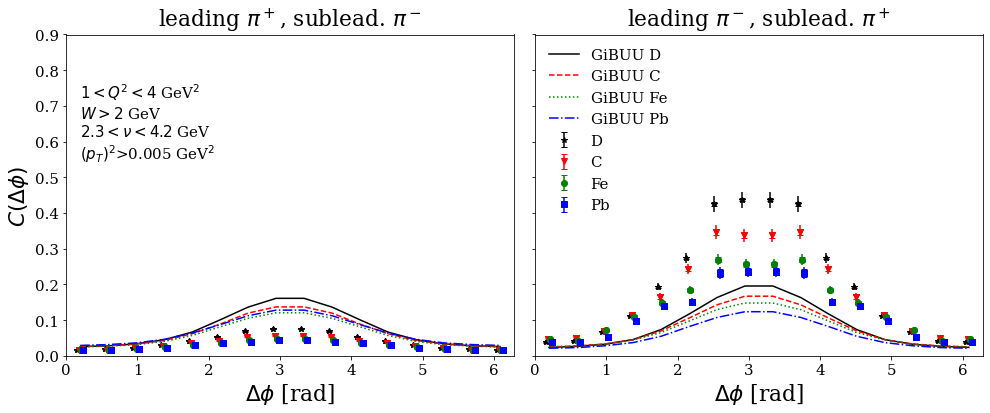

{('D', 211): {'y': array([0.01657058, 0.01827174, 0.02219265, 0.02913306, 0.04130459,
       0.05323086, 0.06806804, 0.07490852]), 'dystat': array([0.00018584, 0.00019163, 0.00021822, 0.00024463, 0.00029788,
       0.00034956, 0.00038978, 0.000412  ]), 'dysyst': array([0.00082853, 0.00091359, 0.00110963, 0.00145665, 0.00206523,
       0.00266154, 0.0034034 , 0.00374543]), 'bins': array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 3.14159265])}, ('C', 211): {'y': array([0.01639669, 0.01758717, 0.0210042 , 0.02664249, 0.03642826,
       0.0424153 , 0.05405817, 0.05646817]), 'dystat': array([0.00043516, 0.00044494, 0.00050039, 0.00055029, 0.00065789,
       0.00072894, 0.00081846, 0.00084226]), 'dysyst': array([0.00081983, 0.00087936, 0.00105021, 0.00133212, 0.00182141,
       0.00212076, 0.00270291, 0.00282341]), 'bins': array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 

In [44]:
fig, axs = plt.subplots(1,2, figsize=(14,6),sharey='all')
pids = [211, -211]
linestyles='- -- : -.'.split()
titles = ["leading $\\pi^+$, sublead. $\\pi^-$", "leading $\\pi^-$, sublead. $\\pi^+$"]
systPct=5

normalize_to_D=False
corr_func_data={}
for j in range(2):
    plt.sca(axs[j])
    pid = pids[j]
    colors='krgb'
    markers='*vos'
    integral_data_D = 0
    integral_GiBUU_D = 0
    for i, A in enumerate("D C Fe Pb".split()):
        
        q = f"h1_pid=={pid}  and h2_z>0.05 and h1_cm_pt > 0.0707 and h2_cm_pt > 0.0707"
        bins = np.linspace(0,np.pi,9)
        shift = 0.07*(bins[1]-bins[0])*(i-1.5)
        N2, x = np.histogram(dfs_data[f"{A}_2pi"].query(q)['dphi'], bins=bins)
        N2mix, x = np.histogram(dfs_mixed[f"{A}_2pi"].query(q)['dphi'], bins=bins)
        
        #single particle efficiency
        if not normalize_to_D:
            qnum = f"h2_z>0.05 and h1_truth_pid=={pid} and h2_pid=={-pid} "
            qnum += " and abs(h2_deltaZ)<3 and h2_FidCut==1 and h1_FidCut==1 and abs(h1_deltaZ)<3"
            
            qdenom =  f"h1_truth_pid=={pid} and h2_truth_pid=={-pid} and h1_FidCut==1 and abs(h1_deltaZ)<3"
            eff = sum(dfs_mc[f"{A}_2pi"].query(qnum).weight_truth)/\
                sum(dfs_mc[f"{A}_2pi"].query(qdenom).weight_truth)
            print(pid, eff)
        else : 
            eff = 1
        qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.0707"
        N1 = len(dfs_trigger[A].query(qtrig))
        
        x = (x[1:]+x[:-1])/2
        dx = x[1]-x[0]
        y = N2/dx/(N2mix/(sum(N2mix)/len(N2mix)))/N1/eff/2
        
        dystat = np.sqrt(N2*(N1-N2)/N1**3)/dx/(N2mix/(sum(N2mix)/len(N2mix)))/eff/2
        dysyst =y*systPct/100
        
        if normalize_to_D:
            if A=="D":
                integral_data_D=sum(y)*dx
            y/=integral_data_D
            dystat/=integral_data_D
            dysyst/=integral_data_D
                
        arg = dict(color=colors[i], marker=markers[i], linestyle='',
                  capsize=3)
        plt.errorbar(x+shift, y,dystat, **arg, label=A)
        plt.errorbar(2*np.pi-x+shift, y, dystat, **arg)
        arg['capsize']=0
        dytot = np.hypot(dystat, dysyst)
        plt.errorbar(x+shift,y, dytot, **arg)
        plt.errorbar(2*np.pi-x+shift,y,dytot, **arg)
        
        
        corr_func_data[(A, pid)] = dict(y=y, dystat=dystat, dysyst=dysyst, 
                                        bins=bins)
        
        
        #GiBUU
        q = f"h1_pid=={pid}  and h2_z>0.05 and h1_cm_pt > 0.0707 and h2_cm_pt > 0.0707"
        bins = np.linspace(0,np.pi,9)
        shift = 0.2*(bins[1]-bins[0])*(i-1.5)
        N2, _ = np.histogram(dfs_data[f"GiBUU_{A}_2pi"].query(q)['dphi'], bins=bins)
        
        
        qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.0707"
        N1 = len(dfs_trigger["GiBUU_"+A].query(qtrig))
        y = N2/N1/dx/2
        
        if normalize_to_D:
            if A=="D":
                integral_GiBUU_D=sum(y)*dx
            y/=integral_GiBUU_D
        
        arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])
        
        x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
        y = list(y)+ list(reversed(list(y)))
        plt.plot(x, y, **arg, label=f"GiBUU {A}")
        

    if j == 0:
        plt.gca().text(0.2,0.55,"$1<Q^2<4$ GeV$^2$\n$W>2$ GeV\n$2.3<\\nu<4.2$ GeV\n$(p_T)^2$>0.005 GeV$^2$")
        plt.gca().set_ylabel("$C(\Delta\phi)$")

    else : 
        plt.legend(framealpha=0, loc='upper left')
        plt.ylabel("")
    plt.gca().set_ylim(0,.9)
            #plt.gca().set_ylim(0)
    plt.title(titles[j])
    plt.gca().set_xlim(0,2*np.pi)
    plt.xlabel("$\\Delta\phi$ [rad]")
plt.tight_layout()
plt.savefig("images/corr_1d_dphi_charge.pdf")
plt.savefig("images/corr_1d_dphi_charge.png")
plt.show()
print(corr_func_data)

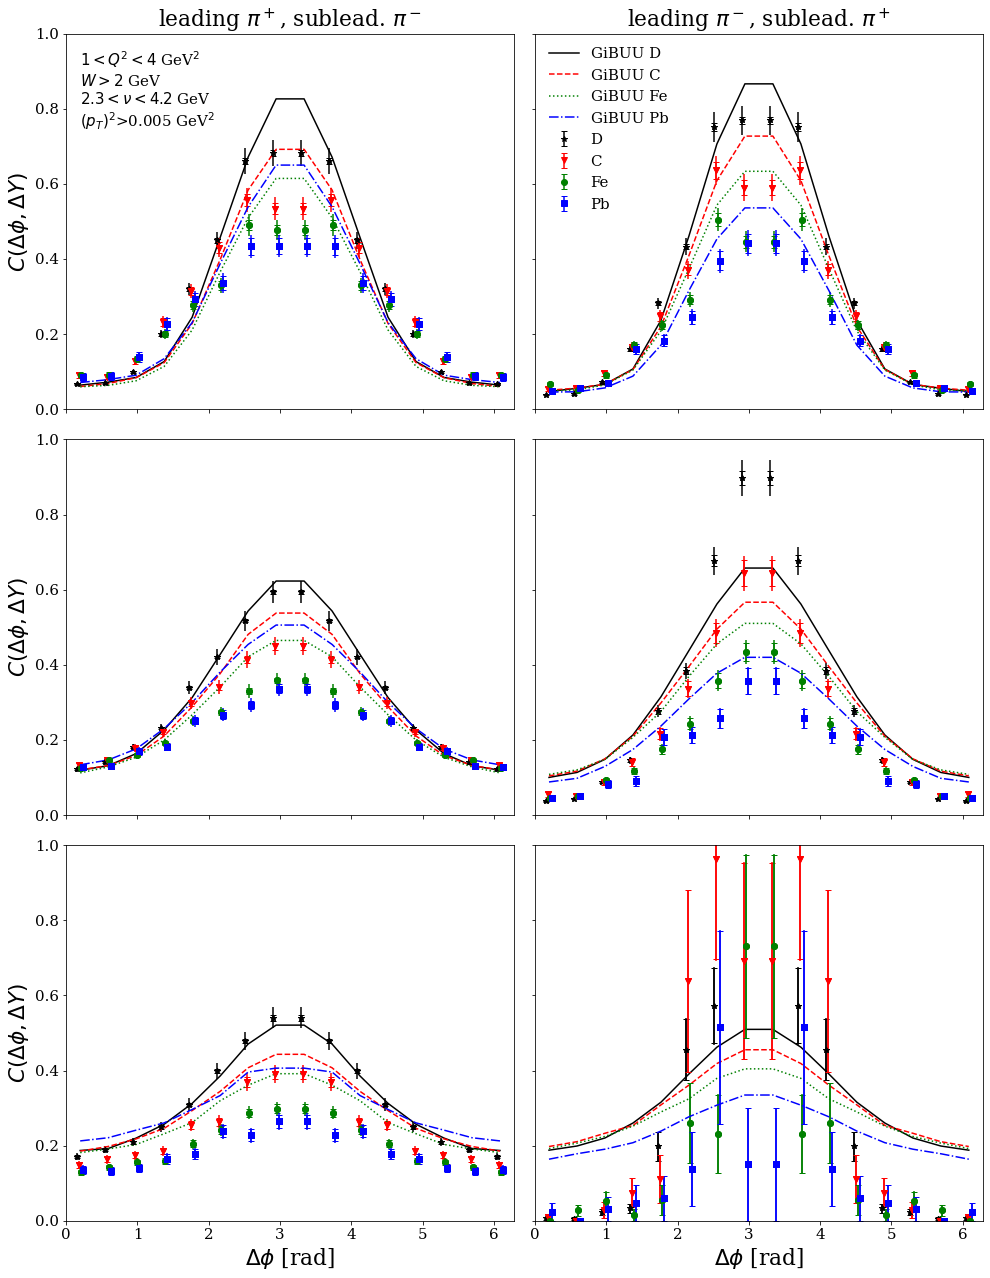

{('D', 211): {'y': array([0.1710626 , 0.18929486, 0.2095177 , 0.24952492, 0.30952954,
       0.39859473, 0.4786227 , 0.54033204]), 'dystat': array([0.00321247, 0.00340282, 0.00372488, 0.00422479, 0.00486486,
       0.00587665, 0.00656242, 0.00725949]), 'dysyst': array([0.00855313, 0.00946474, 0.01047589, 0.01247625, 0.01547648,
       0.01992974, 0.02393114, 0.0270166 ]), 'bins': array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 3.14159265])}, ('C', 211): {'y': array([0.14909163, 0.1632728 , 0.17488711, 0.18577563, 0.2546882 ,
       0.26386072, 0.36919462, 0.39127354]), 'dystat': array([0.00728641, 0.00761415, 0.00819161, 0.00847158, 0.01042916,
       0.01108856, 0.01371126, 0.01448111]), 'dysyst': array([0.00745458, 0.00816364, 0.00874436, 0.00928878, 0.01273441,
       0.01319304, 0.01845973, 0.01956368]), 'bins': array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 

In [475]:
npanels_dY=3
fig, axs = plt.subplots(npanels_dY,2, figsize=(14,18),sharey='all', sharex='all')
pids = [211, -211]
linestyles='- -- : -.'.split()
titles = ["leading $\\pi^+$, sublead. $\\pi^-$", "leading $\\pi^-$, sublead. $\\pi^+$"]
systPct=5

normalize_to_D=True
corr_func_data_dphi_dY={}
for k in range(npanels_dY):
    dY_range=(k, k+1)
    for j in range(2):
        plt.sca(axs[k][j])
        pid = pids[j]
        colors='krgb'
        markers='*vos'
        integral_data_D = 0
        integral_GiBUU_D = 0
        for i, A in enumerate("D C Fe Pb".split()):

            q = f"h1_pid=={pid}  and h2_z>0.05 and h1_cm_pt > 0.0707 and h2_cm_pt > 0.15"
            q+= f" and drap>={dY_range[0]} and drap<{dY_range[1]} and h2_pid=={-pid}"
            bins = np.linspace(0,np.pi,9)
            shift = 0.07*(bins[1]-bins[0])*(i-1.5)
            N2, x = np.histogram(dfs_data[f"{A}_2pi"].query(q)['dphi'], bins=bins)
            N2mix, x = np.histogram(dfs_mixed[f"{A}_2pi"].query(q)['dphi'], bins=bins)

            #single particle efficiency
            if not normalize_to_D:
                qnum = f"h2_z>0.05 and h1_truth_pid=={pid} and h2_pid=={-pid} "
                qnum += " and abs(h2_deltaZ)<3 and h2_FidCut==1 and h1_FidCut==1 and abs(h1_deltaZ)<3"
                qnum += f" and drap_truth>={dY_range[0]} and drap_truth<{dY_range[1]}"
                qdenom =  f"h1_truth_pid=={pid} and h2_truth_pid=={-pid} and h1_FidCut==1 and abs(h1_deltaZ)<3"
                qdenom += f" and drap_truth>={dY_range[0]} and drap_truth<{dY_range[1]}"
                eff = len(dfs_mc[f"{A}_2pi"].query(qnum))/\
                    len(dfs_mc[f"{A}_2pi"].query(qdenom))
                print(pid, eff)
                
            else : 
                eff = 1
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.0707"
            N1 = len(dfs_trigger[A].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]
            y = N2/dx/(N2mix/(sum(N2mix)/len(N2mix)))/N1/eff/2

            dystat = np.sqrt(N2*(N1-N2)/N1**3)/dx/(N2mix/(sum(N2mix)/len(N2mix)))/eff/2
            dysyst =y*systPct/100

            if normalize_to_D:
                if A=="D":
                    integral_data_D=sum(y)*dx
                y/=integral_data_D
                dystat/=integral_data_D
                dysyst/=integral_data_D

            arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3)
            plt.errorbar(x+shift, y,dystat, **arg, label=A)
            plt.errorbar(2*np.pi-x+shift, y, dystat, **arg)
            arg['capsize']=0
            dytot = np.hypot(dystat, dysyst)
            plt.errorbar(x+shift,y, dytot, **arg)
            plt.errorbar(2*np.pi-x+shift,y,dytot, **arg)


            corr_func_data_dphi_dY[(A, pid)] = dict(y=y, dystat=dystat, dysyst=dysyst, 
                                            bins=bins)


            #GiBUU
            q = f"h1_pid=={pid}  and h2_z>0.05 and h1_cm_pt > 0.0707 and h2_cm_pt > 0.0707 and h2_pid=={-pid}"
            q+= f" and drap>={dY_range[0]} and drap<{dY_range[1]}"
            bins = np.linspace(0,np.pi,9)
            shift = 0.2*(bins[1]-bins[0])*(i-1.5)
            N2, _ = np.histogram(dfs_data[f"GiBUU_{A}_2pi"].query(q)['dphi'], bins=bins)


            qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.0707"
            N1 = len(dfs_trigger["GiBUU_"+A].query(qtrig))
            y = N2/N1/dx/2

            if normalize_to_D:
                if A=="D":
                    integral_GiBUU_D=sum(y)*dx
                y/=integral_GiBUU_D

            arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])

            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            y = list(y)+ list(reversed(list(y)))
            plt.plot(x, y, **arg, label=f"GiBUU {A}")


        if j == 0 and k == 0:
            plt.gca().text(0.2,0.75,"$1<Q^2<4$ GeV$^2$\n$W>2$ GeV\n$2.3<\\nu<4.2$ GeV\n$(p_T)^2$>0.005 GeV$^2$")
        if j==0:
            plt.gca().set_ylabel("$C(\Delta\phi, \Delta Y)$")

        if k ==0 and j == 1: 
            plt.legend(framealpha=0, loc='upper left')
            plt.ylabel("")
        plt.gca().set_ylim(0,1)
                #plt.gca().set_ylim(0)
        if k == 0:
            plt.title(titles[j])
        plt.gca().set_xlim(0,2*np.pi)
        
        if k == npanels_dY-1:
            plt.xlabel("$\\Delta\phi$ [rad]")
plt.tight_layout()
plt.savefig("images/corr_1d_dphi_charge.pdf")
plt.savefig("images/corr_1d_dphi_charge.png")
plt.show()
print(corr_func_data_dphi_dY)

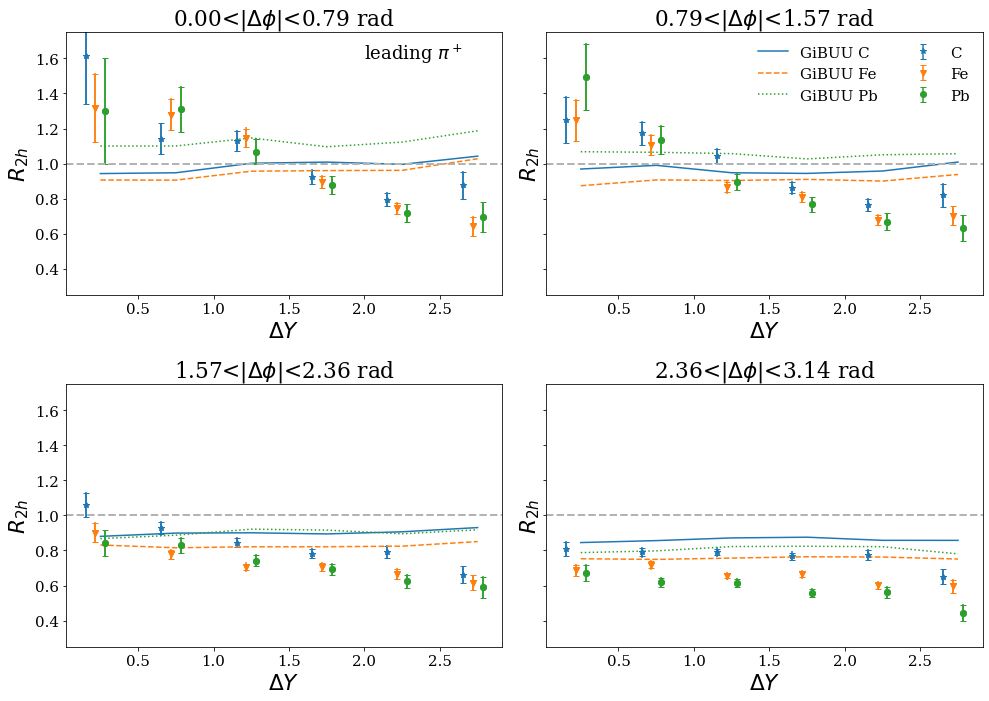

<ipython-input-125-7172f8fb8686>:25: RuntimeWarning: divide by zero encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-125-7172f8fb8686>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-125-7172f8fb8686>:27: RuntimeWarning: divide by zero encountered in true_divide
  dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))
/home/sebouh/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/home/sebouh/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
<ipython-input-125-7172f8fb8686>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-125-7172f8fb8686>:27: RuntimeWarning: divide by zero encountered in true_divide
 

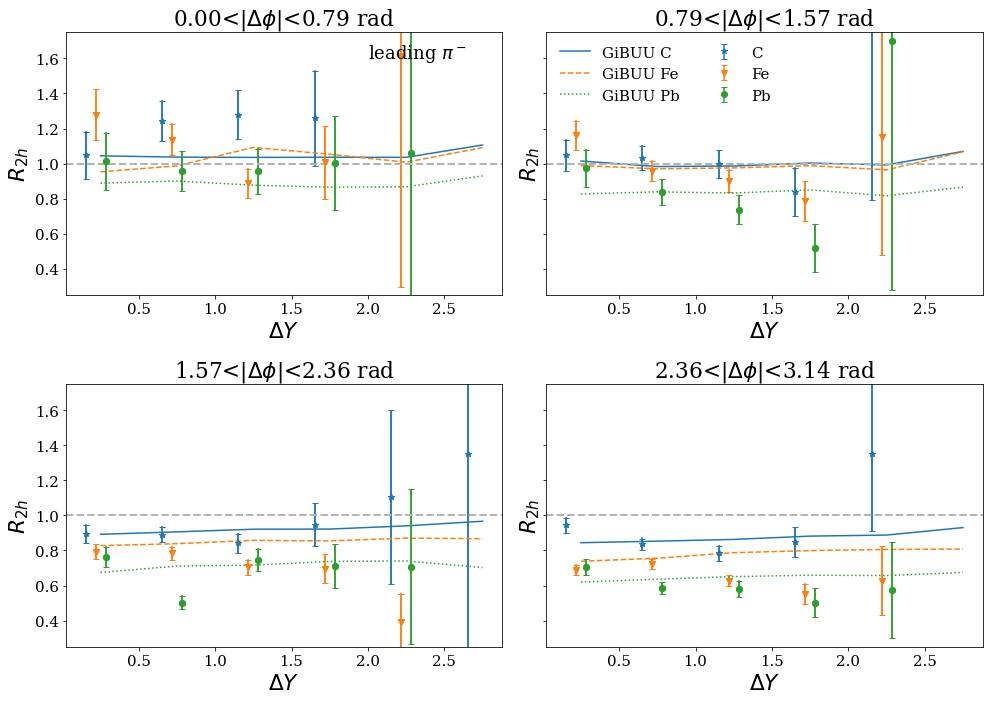

{(211, 'C', 0): {'y': array([1.61563723, 1.14046042, 1.12814333, 0.9236739 , 0.79390467,
       0.87713714]), 'dystat': array([0.27780034, 0.0885823 , 0.0561241 , 0.0386889 , 0.03816939,
       0.0768569 ]), 'dysyst': array([0.04039093, 0.02851151, 0.02820358, 0.02309185, 0.01984762,
       0.02192843]), 'phirange': (0.0, 0.7853981633974483), 'bins': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])}, (211, 'Fe', 0): {'y': array([1.31862975, 1.27909411, 1.14786997, 0.89536588, 0.74348293,
       0.64150735]), 'dystat': array([0.19304031, 0.08883741, 0.05063725, 0.03390988, 0.03338635,
       0.05465289]), 'dysyst': array([0.03296574, 0.03197735, 0.02869675, 0.02238415, 0.01858707,
       0.01603768]), 'phirange': (0.0, 0.7853981633974483), 'bins': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])}, (211, 'Pb', 0): {'y': array([1.29899814, 1.30930765, 1.06873445, 0.87673087, 0.71689992,
       0.69408435]), 'dystat': array([0.30279968, 0.12992582, 0.07067596, 0.05029136, 0.04993693,
       0.08706019

In [125]:
data_R2h_dphi_dY={}
systPct=2.5
for pid in 211, -211:
    fig, axs = plt.subplots(2,2,figsize=(14,10),sharey='all')
    #ymax=0
    for i in range(4):
        plt.sca(axs[i//2][i%2])
        
        phirange=(i*np.pi/4,(i+1)*np.pi/4)
        
        colors='tab:blue tab:orange tab:green'.split()
        for j, A in enumerate("C Fe Pb".split()):
            
            q = f"h1_pid=={pid} and dphi>%s and dphi<%s and h1_cm_pt>0.0707 and h2_cm_pt>0.0707" % phirange
        
            bins=np.linspace(0, 3, 7)
            N2A, x = np.histogram(dfs_data[f"{A}_2pi"].query(q)['drap'], bins=bins)
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.0707"
            N1A = len(dfs_trigger[A].query(qtrig))
            N2D, x = np.histogram(dfs_data[f"D_{A}_2pi"].query(q)['drap'], bins=bins)
            N1D = len(dfs_trigger[f"D_{A}"].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]
            y = N2A/N1A/(N2D/N1D)

            dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))

            arg = dict(color=colors[j], marker=markers[j], linestyle='',
                      capsize=3)
            
            shift = 0.13*(bins[1]-bins[0])*(j-1.5)
            
            plt.errorbar(x+shift, y,dystat, **arg, label=A)
            arg['capsize']=0
            dysyst =y*systPct/100
            
            dytot = np.hypot(dystat, dysyst)
            plt.errorbar(x+shift,y, dytot, **arg)
            data_R2h_dphi_dY[(pid, A, i)] = dict(y=y, dystat=dystat, dysyst=dysyst,
                                           phirange=phirange, bins=bins)
            
            #GiBUU
            bins=np.linspace(0, 3, 7)
            N2A, x = np.histogram(dfs_data[f"GiBUU_{A}_2pi"].query(q)['drap'], bins=bins)
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.0707"
            N1A = len(dfs_trigger["GiBUU_"+A].query(qtrig))
            N2D, x = np.histogram(dfs_data[f"GiBUU_D_2pi"].query(q)['drap'], bins=bins)
            N1D = len(dfs_trigger["GiBUU_D"].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]
            y = N2A/N1A/(N2D/N1D)
            arg = dict(color=colors[j], marker=None, linestyle=linestyles[j])
        
            plt.plot(x, y, **arg, label=f"GiBUU {A}")
            
        plt.xlabel("$\\Delta Y$")
        
        plt.ylabel("$R_{2h}$")
        plt.axhline(1,color='0.7', linestyle='--', linewidth=2)
        
        plt.gca().set_title("%.2f<$|\\Delta\\phi|$<%.2f rad" %phirange)
        plt.gca().set_ylim(0.25,1.75)

    axs[0][0].text(2.0, 1.6, f"leading $\\pi^{'+' if pid==211 else '-'}$", fontsize=18)
    axs[0][1].legend(framealpha=0, ncol=2)
        #if plt.gca().get_ylim()[1]>ymax:
        #    ymax=plt.gca().get_ylim()[1]
    #for i in range(4):
    #    axs[i//2][i%2].set_ylim(0,ymax)
    plt.tight_layout()
    plt.savefig(f"images/R2h_{topo}_drap_vs_dphi_leading_{pid}.png")
    plt.show()
print(data_R2h_dphi_dY)

In [113]:
chi2 = 0
ndof = 0
for key in data_R2h_dphi_dY:
    if -211 in key:
        continue
    pip = data_R2h_dphi_dY[key]
    newkey = (-key[0], key[1], key[2])
    pim = data_R2h_dphi_dY[newkey]
    N=5 if not np.isinf(pim["y"][4]) else 4
    chi2+=sum((pip["y"][:N]-pim["y"][:N])**2/(pip["dystat"][:N]**2+pim["dystat"][:N]**2))
    ndof +=N
print(chi2, ndof)

110.20960073949543 59


<ipython-input-128-9a87780e7a3e>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-128-9a87780e7a3e>:27: RuntimeWarning: divide by zero encountered in true_divide
  dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))
<ipython-input-128-9a87780e7a3e>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-128-9a87780e7a3e>:27: RuntimeWarning: divide by zero encountered in true_divide
  dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))
<ipython-input-128-9a87780e7a3e>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-128-9a87780e7a3e>:27: RuntimeWarning: divide by zero encountered in true_divide
  dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))
<ipython-input-128-9a87780e7a3e>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-128-9a87780e7a3e>:27: RuntimeWarning: divi

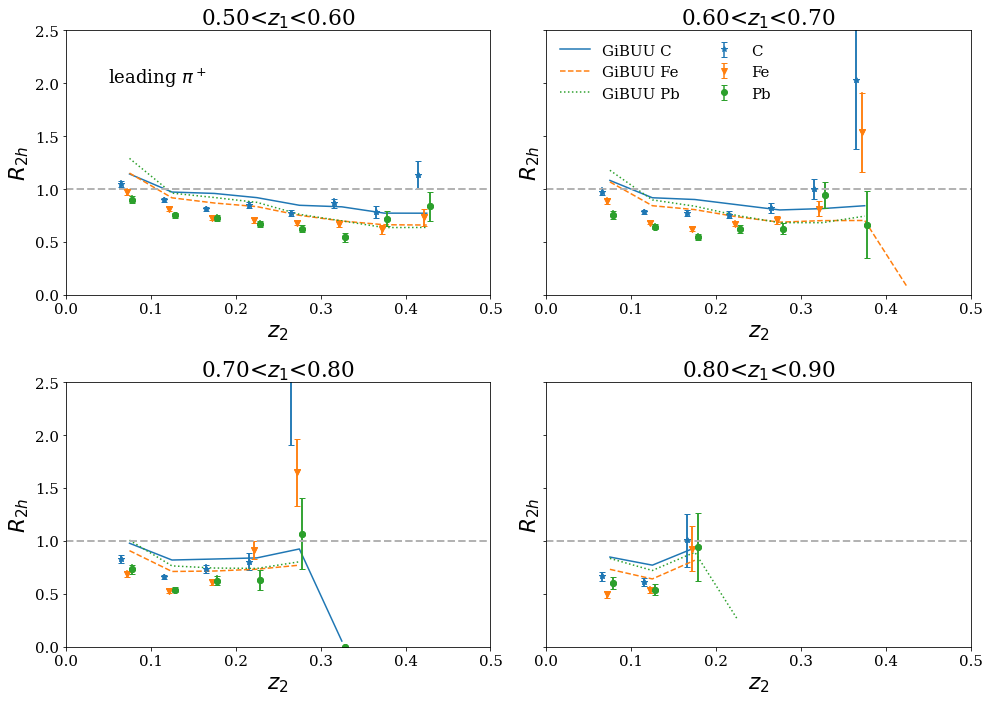

<ipython-input-128-9a87780e7a3e>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-128-9a87780e7a3e>:27: RuntimeWarning: divide by zero encountered in true_divide
  dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))
<ipython-input-128-9a87780e7a3e>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-128-9a87780e7a3e>:27: RuntimeWarning: divide by zero encountered in true_divide
  dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))
<ipython-input-128-9a87780e7a3e>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-128-9a87780e7a3e>:27: RuntimeWarning: divide by zero encountered in true_divide
  dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))
<ipython-input-128-9a87780e7a3e>:25: RuntimeWarning: invalid value encountered in true_divide
  y = N2A/N1A/(N2D/N1D)
<ipython-input-128-9a87780e7a3e>:27: RuntimeWarning: divi

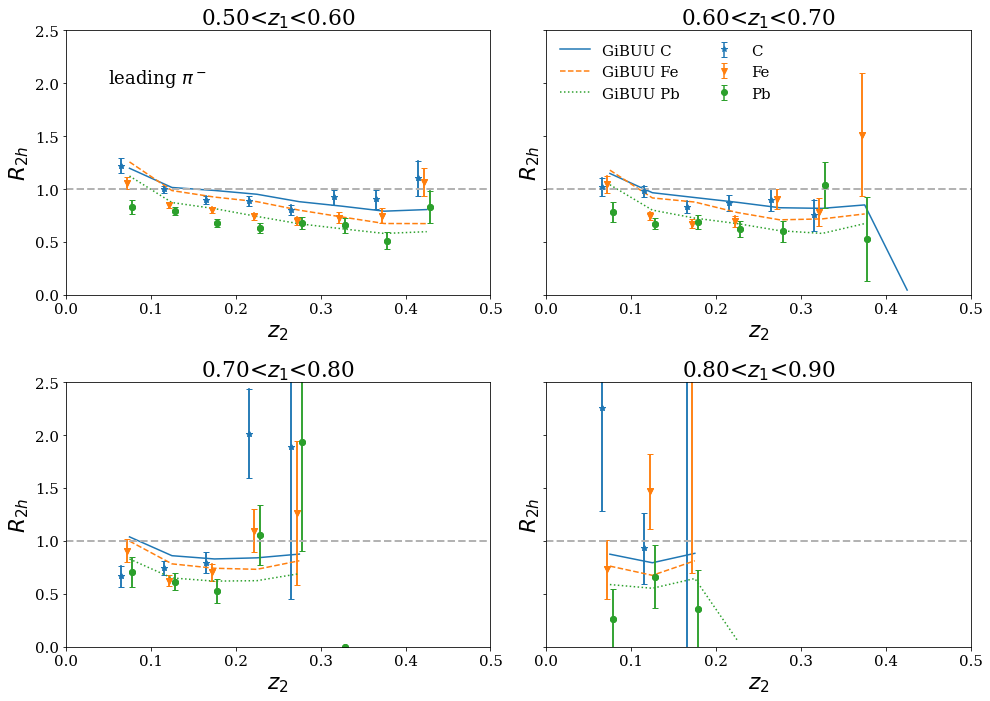

{(211, 'C', 0): {'y': array([1.04526525, 0.89734706, 0.81045083, 0.84939496, 0.77039546,
       0.8638761 , 0.78062122, 1.13209589]), 'dystat': array([0.02971558, 0.01980173, 0.02240452, 0.02552488, 0.02891901,
       0.04328755, 0.05563423, 0.13215035]), 'dysyst': array([0.02613163, 0.02243368, 0.02026127, 0.02123487, 0.01925989,
       0.0215969 , 0.01951553, 0.0283024 ]), 'phirange': (2.356194490192345, 3.141592653589793), 'bins': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])}, (211, 'Fe', 0): {'y': array([0.9702102 , 0.81347393, 0.72990682, 0.70309886, 0.68166618,
       0.67165685, 0.62019856, 0.73380017]), 'dystat': array([0.0253384 , 0.01648098, 0.01878627, 0.01984877, 0.02364375,
       0.03226994, 0.04105237, 0.07946647]), 'dysyst': array([0.02425526, 0.02033685, 0.01824767, 0.01757747, 0.01704165,
       0.01679142, 0.01550496, 0.018345  ]), 'phirange': (2.356194490192345, 3.141592653589793), 'bins': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]

In [128]:
data_R2h_z1_z2={}
systPct=2.5
for pid in 211, -211:
    fig, axs = plt.subplots(2,2,figsize=(14,10),sharey='all')
    #ymax=0
    for i in range(4):
        plt.sca(axs[i//2][i%2])
        
        z1range=0.5+i*.1,0.6+i*.1
        
        colors='tab:blue tab:orange tab:green'.split()
        for j, A in enumerate("C Fe Pb".split()):
            
            q = f"h1_pid=={pid} and h1_z>%s and h1_z<%s and h1_cm_pt>0.0707 and h2_cm_pt>0.0707" % z1range
        
            bins=np.linspace(0.05, 0.45, 9)
            N2A, x = np.histogram(dfs_data[f"{A}_2pi"].query(q)['h2_z'], bins=bins)
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.0707 and h1_z>%s and h1_z<%s "% z1range
            N1A = len(dfs_trigger[A].query(qtrig))
            N2D, x = np.histogram(dfs_data[f"D_{A}_2pi"].query(q)['h2_z'], bins=bins)
            N1D = len(dfs_trigger[f"D_{A}"].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]
            y = N2A/N1A/(N2D/N1D)

            dystat = y*np.sqrt((N1A-N2A)/(N1A*N2A)+(N1D-N2D)/(N1D*N2D))

            arg = dict(color=colors[j], marker=markers[j], linestyle='',
                      capsize=3)
            
            shift = 0.13*(bins[1]-bins[0])*(j-1.5)
            
            plt.errorbar(x+shift, y,dystat, **arg, label=A)
            arg['capsize']=0
            dysyst =y*systPct/100
            
            dytot = np.hypot(dystat, dysyst)
            plt.errorbar(x+shift,y, dytot, **arg)
            data_R2h_dphi_dY[(pid, A, i)] = dict(y=y, dystat=dystat, dysyst=dysyst,
                                           phirange=phirange, bins=bins)
            
            #GiBUU
            N2A, x = np.histogram(dfs_data[f"GiBUU_{A}_2pi"].query(q)['h2_z'], bins=bins)
            N1A = len(dfs_trigger["GiBUU_"+A].query(qtrig))
            N2D, x = np.histogram(dfs_data[f"GiBUU_D_2pi"].query(q)['h2_z'], bins=bins)
            N1D = len(dfs_trigger["GiBUU_D"].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]
            y = N2A/N1A/(N2D/N1D)
            keep =(N1A !=0) & (N2D!=0) & (N1D!=0) & (N2A!=0)
            x = x[keep]
            y = y[keep]
            arg = dict(color=colors[j], marker=None, linestyle=linestyles[j])
        
            plt.plot(x, y, **arg, label=f"GiBUU {A}")
            
        plt.xlabel("$z_2$")
        
        plt.ylabel("$R_{2h}$")
        plt.axhline(1,color='0.7', linestyle='--', linewidth=2)
        
        plt.gca().set_title("%.2f<$z_1$<%.2f" %z1range)
        plt.gca().set_ylim(0,2.5)
        plt.xlim(0,0.5)

    axs[0][0].text(0.05, 2.0, f"leading $\\pi^{'+' if pid==211 else '-'}$", fontsize=18)
    axs[0][1].legend(framealpha=0, ncol=2)
        #if plt.gca().get_ylim()[1]>ymax:
        #    ymax=plt.gca().get_ylim()[1]
    #for i in range(4):
    #    axs[i//2][i%2].set_ylim(0,ymax)
    
    plt.tight_layout()
    plt.savefig(f"images/R2h_{topo}_z1_vs_z2_leading_{pid}.png")
    plt.show()
    
print(data_R2h_dphi_dY)

In [120]:
chi2 = 0
ndof = 0
for key in data_R2h_z1_z2:
    if -211 in key:
        continue
    pip = data_R2h_dphi_dY[key]
    newkey = (-key[0], key[1], key[2])
    pim = data_R2h_dphi_dY[newkey]
    N=5 if not np.isinf(pim["y"][4]) else 4
    chi2+=sum((pip["y"][:N]-pim["y"][:N])**2/(pip["dystat"][:N]**2+pim["dystat"][:N]**2))
    ndof +=N
print(chi2, ndof)

0 0


60

In [16]:
df=dfs_mc["C_2pi"]

In [17]:
list(df.columns)

['dphi',
 'dphi_lab',
 'drap',
 'h1_z',
 'h2_z',
 'h1_cm_pt',
 'h2_cm_pt',
 'h1_xf',
 'h2_xf',
 'h1_rap',
 'ycm',
 'h2_rap',
 'h1_pid',
 'h2_pid',
 'h1_cm_ph',
 'h2_cm_ph',
 'h1_cm_th',
 'h2_cm_th',
 'pair_mass',
 'pair_pt',
 'mx_eh1h2x',
 'mx_eh1x',
 'mx_eh2x',
 't',
 'Q2',
 'nu',
 'W',
 'e_px',
 'e_py',
 'e_pz',
 'e_p',
 'e_ph',
 'e_th',
 'SampFracEl25',
 'SampFracEl20',
 'TargTypeSM',
 'TargType',
 'x',
 'u',
 'h1_ph',
 'h1_th',
 'h2_ph',
 'h2_th',
 'h1_deltaZ',
 'h2_deltaZ',
 'h1_Nphe',
 'h2_Nphe',
 'h1_Sector',
 'h2_Sector',
 'h1_FidCut',
 'h2_FidCut',
 'h1_FidCutPiPlus',
 'h2_FidCutPiPlus',
 'h1_Chi2CC',
 'h2_Chi2CC',
 'h1_StatCC',
 'h2_StatCC',
 'h1_Betta',
 'h2_Betta',
 'h1_T4',
 'h2_T4',
 'evnt',
 'pass_recon',
 'dphi_truth',
 'dphi_lab_truth',
 'drap_truth',
 'h1_truth_z',
 'h2_truth_z',
 'h1_truth_cm_pt',
 'h2_truth_cm_pt',
 'h1_truth_xf',
 'h2_truth_xf',
 'h1_truth_rap',
 'ycm_truth',
 'h2_truth_rap',
 'h1_truth_pid',
 'h2_truth_pid',
 'h1_truth_cm_ph',
 'h2_truth_cm_ph',
 

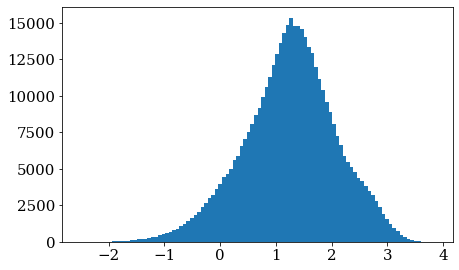

In [21]:
plt.hist(df., bins=100)
plt.show()

In [32]:
print(len(df.query("h2_z>0.05 and h2_deltaZ<3 and h2_FidCut==1"))/len(df))

0.34798791384336547


In [95]:
import R2h_module as R2h
for pid in 211, -211:
    qnum = f"h2_z>0.05 and h1_truth_pid=={pid} and h2_truth_pid=={-pid} and pass_recon==1 "
    qnum += " and h2_truth_cm_pt>0.0707 and h2_deltaZ<3 "
    qnum += " and h1_truth_cm_pt>0.0707 and abs(h1_deltaZ)<3  and Q2>1.0 and Q2<4.0 and nu>2.2 and nu<4.2"
    qnum += ""
    qnum += " and h1_p <5.0 and h1_p>0.2 and h1_th>10"
    qnum += " and ((h1_pid>0) | (h1_pid==-211 & h1_th>25 & h1_p>0.7) | (h1_pid==-211 & h1_p>0.5 & h1_th>30) | (h1_pid==-211 & h1_th>40))"
    qnum += " and h2_p <5.0 and h2_p>0.2 and h2_th>10"
    qnum += " and ((h2_pid>0) | (h2_pid==-211 & h2_th>25 & h2_p>0.7) | (h2_pid==-211 & h2_p>0.5 & h2_th>30) | (h2_pid==-211 & h2_th>40))"
    qnum += " and "+ R2h.trigger_cut_nom + " and " + R2h.pair_cut_nom
    wnum = sum(dfs_mc["C_2pi"].query(qnum).eval("weight_truth"))
    nnum=len(dfs_mc["C_2pi"].query(qnum))
    
    qdenom = f"h1_truth_pid=={pid} and h2_truth_pid=={-pid} "
    qdenom += " and h2_truth_cm_pt>0.0707 and abs(h1_deltaZ)<3"
    qdenom += " and h1_truth_cm_pt>0.0707 "
    qdenom += " and h1_p <5.0 and h1_p>0.2 and h1_th>10 and Q2>1.0 and Q2<4.0 and nu>2.2 and nu<4.2"
    qdenom += " and ((h1_pid>0) | (h1_pid==-211 & h1_th>25 & h1_p>0.7) | (h1_pid==-211 & h1_p>0.5 & h1_th>30) | (h1_pid==-211 & h1_th>40))"
    qdenom += " and "+ R2h.trigger_cut_nom
    wdenom = sum(dfs_mc["C_2pi"].query(qdenom).eval("weight_truth"))
    ndenom= len(dfs_mc["C_2pi"].query(qdenom))
    eff_weighted = wnum/wdenom
    print(eff_weighted)
    print(nnum, ndenom)

0.5255060399968635
66221 125043
0.5374709798952317
38378 71751


In [108]:
import R2h_module as R2h

weight = "weight_truth"
weight="weight_truth/weight_truth"
for pid in 211, -211:
    qnum = f"h2_z>0.05 and h1_truth_pid=={pid} and h2_truth_pid=={-pid} and pass_recon==1 and h1_truth_cm_pt>0.0707 and h2_truth_cm_pt>0.0707"
    wnum = sum(R2h.applyCuts(R2h.applyCutsPair((dfs_mc["C_2pi"]), nomCuts=True),nomCuts=True).query(qnum).eval(weight))
   # nnum=len(dfs_mc["C_2pi"].query(qnum))
    
    qdenom = f"h1_truth_pid=={pid} and h2_truth_pid=={-pid} and h1_truth_cm_pt>0.0707"
    
    wdenom = sum(R2h.applyCuts(dfs_mc["C_2pi"], nomCuts=True).query(qdenom).eval(weight))
    #ndenom= len(dfs_mc["C_2pi"].query(qdenom))
    eff_weighted = wnum/wdenom
    print("\n\n", eff_weighted, "\n\n")
    #print(nnum, ndenom)

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 432561  (100.00  %)
2.2 < nu < 4.2 432561  (100.00  %)
secondary hadrons are pions 258161  (59.68  %)
(h1_pid*h2_pid)<0, opposite charge pions 257982  (99.93  %)
kinematic limits for h2_z 253124  (98.12  %)
kinematic limits for dphi 252808  (99.88  %)
kinematic limits for pair_mass 243562  (96.34  %)
leading hadrons are pions 243562  (100.00  %)
0.2<h2_p<5.0 243000  (99.77  %)
0.2<h1_p<5.0 243000  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 243000  (100.00  %)
10<h2_th 242953  (99.98  %)
Theta/P fiducial region selected for secondary hadron 231020  (95.09  %)
10< h1_th 231020  (100.00  %)
Theta/P fiducial region selected for trigger hadron 231020  (100.00  %)
Nom cuts for the pair applied (pi pi) 101981  (44.14  %)
Entries before cut  101981
Q2>1.0 and Q2<4.0 101981  (100.00  %)
0.2<h1_p<5.0  101981  (100.00  %)
inelasticity < 0.85 101981  (100.00  %)
h1_pid = pions (trigger) 101981  (10

(array([17182., 76972., 85686., 56929., 22032.,  1146.,   143.,     0.,
            0.,     0.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]),
 <BarContainer object of 10 artists>)

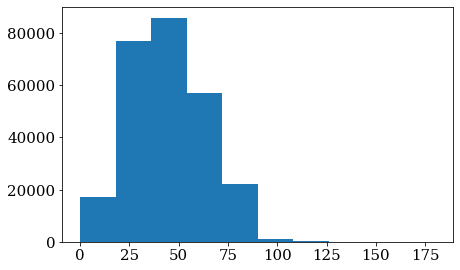

In [79]:
plt.hist(dfs_mc["C_2pi"].h2_th, range=(0,180))

In [134]:
import root_pandas
dfs_mc_unweighted={'MC_'+a : root_pandas.read_root("MC_Pairs_%s_no_h2_kin_cuts.root" %a,a) for a in "C".split()}

Entries before cut  6402146
Q2>1.0 and Q2<4.0 6402146  (100.00  %)
0.2<h1_p<5.0  6402098  (100.00  %)
inelasticity < 0.85 6402098  (100.00  %)
h1_pid = pions (trigger) 1992984  (31.13  %)
2.2 < nu <4.2 1949947  (97.84  %)
10< h1_th 1949947  (100.00  %)
Theta/P fiducial region selected for trigger hadron 1949947  (100.00  %)
Nom cuts for the trigger applied 963746  (49.42  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 374891  (100.00  %)
2.2 < nu < 4.2 374891  (100.00  %)
secondary hadrons are pions 181172  (48.33  %)
(h1_pid*h2_pid)<0, opposite charge pions 158623  (87.55  %)
kinematic limits for h2_z 158057  (99.64  %)
kinematic limits for dphi 157869  (99.88  %)
kinematic limits for pair_mass 150626  (95.41  %)
leading hadrons are pions 150626  (100.00  %)
0.2<h2_p<5.0 143685  (95.39  %)
0.2<h1_p<5.0 143685  (100.00  %)
10<h2_th 142412  (99.11  %)
Theta/P fiducial region selected for secondary hadron 129263  (90.77  %)
10< h1_th 129263  (100.00  %)
Theta/P fiduci

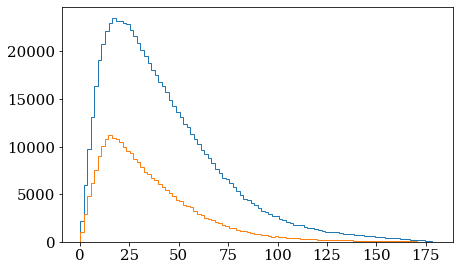

In [137]:
a='C'
imp.reload(R2h)
df_mc = R2h.applyCuts(dfs_mc_unweighted[f"MC_{a}"], nomCuts=True).query("h2_truth_th>0")

df_mc_recon = R2h.applyCutsPair(df.query('h2_z>0.05'), nomCuts=True)
for pid in 211, -211:
    qpid = f"h1_truth_pid=={pid} and h2_truth_pid=={-pid}"
    print(len(df_cut.query(qpid))/len(df.query(qpid)))
    plt.hist(dfs_mc_unweighted[f"MC_{a}"].query(qpid).h2_truth_th, bins =100, histtype='step')
plt.show()

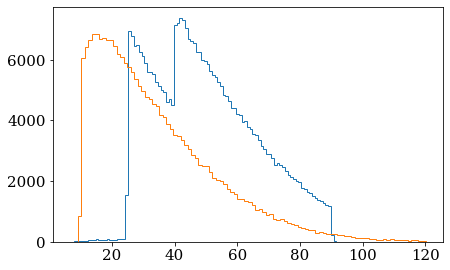

In [130]:
for pid in 211, -211:
    qpid = f"h1_truth_pid=={pid} and h2_truth_pid=={-pid}"
    plt.hist(dfs_mc_unweighted[f"MC_{a}"].query(qpid).h2_truth_th, bins =100, histtype='step')

In [258]:
#deprecated
def mix_corr(df):
    nbins=16
    subbins = 10
    
    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    #print(y1)
    ym=[0]*len(y1)
    #print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    return ym[len(ym)//2:]

In [ ]:
for df in list(dfs_data.values())+ list(dfs_trigger.values()):
    h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_q=f'arctan2((5.014-nu)*sin({theta_e}),(5.014-(5.014-nu)*cos({theta_e})))'
    theta_qe=f"{theta_q}+{theta_e}"
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    df['theta_e'] = df.eval(theta_e)
    df['theta_qe'] = df.eval(theta_qe)
    df['e_q_pz'] = df.eval(e_pz)
    df['e_q_pt'] = df.eval(e_pt)
    dtheta_epi1=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                          /sqrt(e_px**2+e_py**2+e_pz**2)
                          /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")

    df['dtheta_epi1']  = df.eval(f"arccos((cos(theta_qe)*{h1_pz}+sin(theta_qe)*h1_cm_pt*cos(h1_cm_ph))/h1_p)*{180/np.pi}")

In [631]:
#cuts used in the PRL paper
dpionMassBins=11
maxzmass=1.7
minzmass=0.3

dpiondphiBins=9
maxdphi=3.14
mindphi=0.0

dpionz2Bins=9
maxz2=0.45
minz2=0.05


p_thr=2.7
Nphe_thr=5
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

#pair_cut_nom  ='and h1_th<90 and h1_th>10 and h2_th<90 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
#trigger_cut_nom   ='h1_z>0.5 and h1_th<90 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

PRL_pair_cut_nom  ='and h1_th>10 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
PRL_trigger_cut_nom   ='h1_z>0.5 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

# Single function to make all plots


In [638]:
def make_plots(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False):
    #unbinned.
    if slicevar == None:
        slicebins=[0,1]
    
    pids = [211, -211]
    linestyles='- -- : -.'.split()
    titles = ["leading $\\pi^+$, sublead. $\\pi^-$", "leading $\\pi^-$, sublead. $\\pi^+$"]
    systPct=5


    normalize_to_D=False
    data={}
    GiBUU={}

    #make several figures all at the same time.  
    # C: correlation function (normalized to D)
    # S: same-event yield (no correction for efficiency)
    # M: mixed-event yield
    # Ceff:  correlation function with single-particle efficiency correction
    figs = {}
    axs= {}

    s=(', '+slicevartex) if slicevartex!=None else ''
    ylabels = {"C":f"$C(\Delta\phi{s})$",
               "M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$R(\Delta\phi{s})$"
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    keys= "S M C R".split()

    for key in keys:
        height = 18*(len(slicebins)-1)/4
        if slicevar == None:
            height = 7
        width = 14 if not dropLeadPiMinus else 7
        figs[key], axs[key] = plt.subplots(len(slicebins)-1, 1 if dropLeadPiMinus else 2, 
                                           figsize=(width,height),sharey='all', sharex='all')
        if slicevar == None:
            axs[key] = [axs[key]]
        if dropLeadPiMinus:
            axs[key] = [[a] for a in axs[key]]
    artists = []
    for j in range(2 if not dropLeadPiMinus else 1):
        pid = pids[j]
        for k in range(len(slicebins)-1):

            slice_range=slicebins[k:k+2]
            linestyles='- -- : -.'.split()
            colors='k tab:blue tab:orange tab:green'.split()
            markers='*vos'
            integral_data_D = 0
            integral_GiBUU_D = 0
            data_D=None
            stat_D=None
            GiBUU_D=None
            for i, A in enumerate("D C Fe Pb".split()):

                # leave blank the panels with crappy statistics
                if slicevar=='drap' and (j == 0 and k == 0 or j == 1 and k==3) and not dropLeadPiMinus:
                    continue
                    
                if slicevar=='h1_cm_pt' and (j == 1 and k == 0) and not dropLeadPiMinus:
                    continue

                q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > 0.15 and h2_cm_pt > 0.15 and h1_z>0.5 and h2_pid=={-pid}"
                if usePRLcuts:
                    #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                    #so we need this in order to make the comparison
                    q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                
                
                bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,9)
                shift = 0.1*(bins[1]-bins[0])*(i-1.5)
                N2, x = np.histogram(dfs_data[f"{A}_2pi"].query(q)['dphi'], bins=bins)
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5"
                N2mix, x = np.histogram(dfs_mixed[f"D_2pi"].query(q)['dphi'], bins=bins)

                #single particle efficiency
#                 qnum = f"h1_pid=={pid}  and h2_z>0.05"
#                 qnum+= f" and drap_truth>={slice_range[0]} and drap_truth<{slice_range[1]} and h2_pid=={-pid} and h1_cm_pt > 0.0707"
#                 qdenom = f"h1_truth_pid=={pid}  and h2_truth_z>0.05 and h1_cm_pt > 0.0707"
#                 qdenom+= f" and drap_truth>={slice_range[0]} and drap_truth<{slice_range[1]} and h2_truth_pid=={-pid}"
#                 eff = len(df_mc_recon.query(qnum))/\
#                     len(df_mc.query(qdenom))

                qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.150"
                if usePRLcuts:
                    qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom
                N1 = len(dfs_trigger[A].query(qtrig))

                x = (x[1:]+x[:-1])/2
                dx = x[1]-x[0]

                S = N2/dx/N1/2
                dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

                M = N2mix/(sum(N2mix)/len(N2mix))
                dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))
                
                M_err = np.sqrt(np.mean((M-1)**2))/2
                print((A,pid,k),"estimated syst error from event mixing",  M_err)

                #M=mix_corr(dfs_data[f"{A}_2pi"].query(q))
                #dMstat=0

                C = S/M
                dCstat = dSstat/M


                arg = dict(color=colors[i], marker=markers[i], linestyle='',
                          capsize=3)

                axs['S'][k][j].errorbar(x+shift, S,dSstat, **arg, label=A)
                axs['S'][k][j].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

                axs['M'][k][j].errorbar(x+shift, M,dMstat, **arg, label=A)
                axs['M'][k][j].errorbar(2*np.pi-x+shift, M, dMstat, **arg)

                ##axs['Ceff'][k][j].errorbar(x+shift, C/eff,dCstat/eff, **arg, label=A)
                ##axs['Ceff'][k][j].errorbar(2*np.pi-x+shift, C/eff, dCstat/eff, **arg)


                if A=="D":
                    #q = f"h1_pid=={pid}  and h2_z>0.05 and h1_cm_pt > 0.0707 and h2_cm_pt > 0.0707 and h2_pid=={-pid}"
                    #integral_data_D=2*len(dfs_data[f"{A}_2pi"])/len(dfs_trigger[f"{A}"].query(qtrig))
                    integral_data_D=sum(C)*dx*2
                    


                dCsyst = np.hypot(C*systPct/100, C*dMstat)
                C/=integral_data_D
                dCstat/=integral_data_D
                dCsyst/=integral_data_D
                
                if A=='D':
                    data_D=C
                    stat_D=dCstat
                
                
                artists.append(axs['C'][k][j].errorbar(x+shift, C,dCstat, **arg, label=A))
                axs['C'][k][j].errorbar(2*np.pi-x+shift, C, dCstat, **arg)
                arg['capsize']=0
                dCtot = np.hypot(dCstat, dCsyst)
                axs['C'][k][j].errorbar(x+shift,C, dCtot, **arg)
                axs['C'][k][j].errorbar(2*np.pi-x+shift,C,dCtot, **arg)
                if A!="D":
                    axs['R'][k][j].errorbar(x+shift,C/data_D, 
                                        C/data_D*np.hypot(dCstat/C, stat_D/data_D),
                                        **arg)
                
                
                data[(A, pid,k)] = dict(y=C, dystat=dCstat, dysyst=dCsyst, 
                                                bins=bins, slice_range=slice_range)

                #GiBUU
                q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > 0.15 and h2_cm_pt > 0.15 and h2_pid=={-pid}"
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5 and h2_z<0.45"
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                
                shift = 0.2*(bins[1]-bins[0])*(i-1.5)
                N2, _ = np.histogram(dfs_data[f"GiBUU_{A}_2pi"].query(q)['dphi'], bins=bins)


                qtrig = f"h1_pid=={pid} and  h1_cm_pt > 0.150"
                if usePRLcuts:
                    qtrig = "h1_pid==h1_pid"
                N1 = len(dfs_trigger["GiBUU_"+A].query(qtrig))
                y = N2/N1/dx/2

                if A=="D":
                    integral_GiBUU_D=sum(y)*dx*2
                    
                y/=integral_GiBUU_D
                
                GiBUU[(A, pid,k)] = dict(y=y, 
                                                bins=bins, slice_range=slice_range)
                arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])
                
                

                x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
                y = list(y)+ list(reversed(list(y)))
                if A=="D":
                    GiBUU_D = pd.Series(y)
                artists.append(axs['C'][k][j].plot(x, y, **arg, label=f"GiBUU {A}")[0])
                if A!="D":
                    axs['R'][k][j].plot(x, y/GiBUU_D, **arg, label=f"GiBUU {A}")
            for key in keys:

                cuts_txt="$1<Q^2<4$ GeV$^2$\n$W>2$ GeV\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$0.5<z_1<1.0$\n"+\
                      "$0.05<z_2<0.45$\n"+\
                      "$p^T>0.150$ GeV\n" 
                
                if j == 0 and k == 0 and slicevar=='drap' :
                    axs[key][k][j].text(0.05,0.1, cuts_txt,
                                transform=axs[key][k][j].transAxes)
                elif slicevar == None:
                    axs[key][k][j].text(0.67,0.6, cuts_txt,
                                transform=axs[key][k][j].transAxes)
                elif j == 0 and k == 0  and slicevar!='drap':
                    axs[key][k][j].text(0.05,0.5, cuts_txt,
                                transform=axs[key][k][j].transAxes)
                
                #else :
                #    axs[key][k][j].text(0.05,0.1, cuts_txt
                #                transform=axs[key][k][j].transAxes)
                if slicevar != None:    
                    axs[key][k][j].text(0.7,0.85,
                                   f"${slice_range[0]:.1f}<{slicevartex}<{slice_range[1]:.1f}$",
                                  transform=axs[key][k][j].transAxes)
                if j==0:
                    axs[key][k][j].set_ylabel(ylabels[key])

                if k ==0 and j == 0: 
                    if key == "C":
                        a=[artists[i] for i in [0,2,4,6,1,3,5,7]]
                        l=[aa.get_label() for aa in a]
                        ncol=2
                    else: 
                        a=[artists[i] for i in [0,2,4,6]]
                        l=[aa.get_label() for aa in a]
                        ncol=1
                    if slicevar==None:
                        ncol = 1
                    axs[key][0][0].legend(a, l, framealpha=0, 
                            loc='upper left' if key in 'SC' else "lower left", ncol=ncol)
                    #axs[key][k][j].set_ylabel("")
                #plt.gca().set_ylim(0,0.155)
                        #plt.gca().set_ylim(0)
                if k == 0:
                    axs[key][k][j].set_title(titles[j])
                axs[key][k][j].set_xlim(0,2*np.pi)

                if k == len(slicebins)-2:
                    axs[key][k][j].set_xlabel("$\\Delta\phi$ [rad]")
                axs[key][k][j].set_ylim(0)
                #axs[key][k][j].axhline(0, color='0.5', alpha=0.7, linestyle='--')
    
    PRL={"C":[1.019, .962, .976, .944, .876, .841, .812, .789],
         "Fe":[.968, .908, .895, .890, .775, .724, .705, .671],
         "Pb":[.944, .878, .878, .827, .802, .675, .611, .620]}
    x= np.linspace(0, np.pi, 9)
    x = (x[:-1]+x[1:])/2
    for a in PRL.keys():
        axs["R"][0][0].plot(x, PRL[a], marker='x', linestyle='')
    for key in "C S M R".split():
        figs[key].tight_layout()
        if saveFig:
            figs[key].savefig(f"images/{key}_charge_{slicevar}.pdf")
            figs[key].savefig(f"images/{key}_charge_{slicevar}.png")
        figs[key].show()
    return data, GiBUU

In [639]:
all_data={}
all_GiBUU={}

('D', 211, 0) estimated syst error from event mixing 0.0443021902888271
('C', 211, 0) estimated syst error from event mixing 0.0443021902888271
('Fe', 211, 0) estimated syst error from event mixing 0.0443021902888271
('Pb', 211, 0) estimated syst error from event mixing 0.0443021902888271


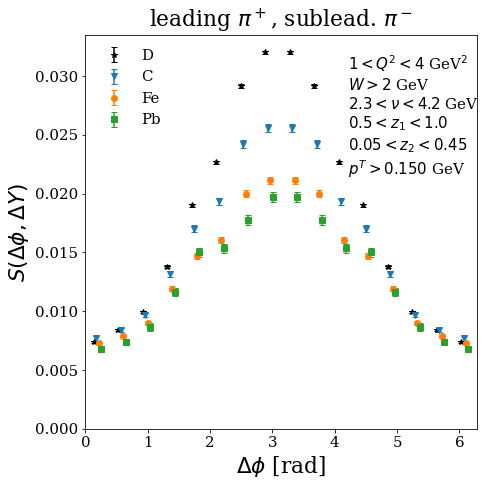

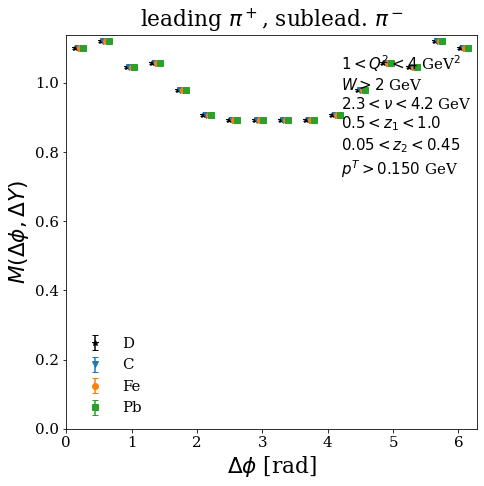

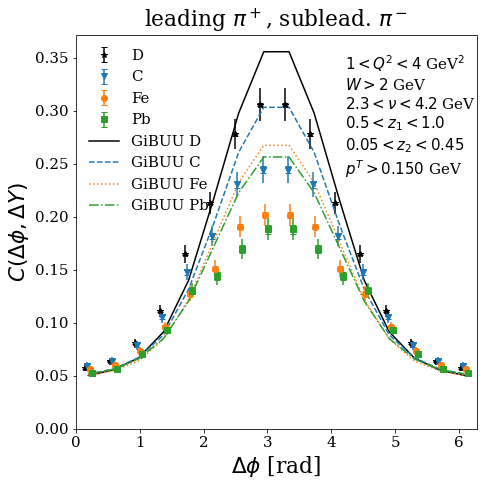

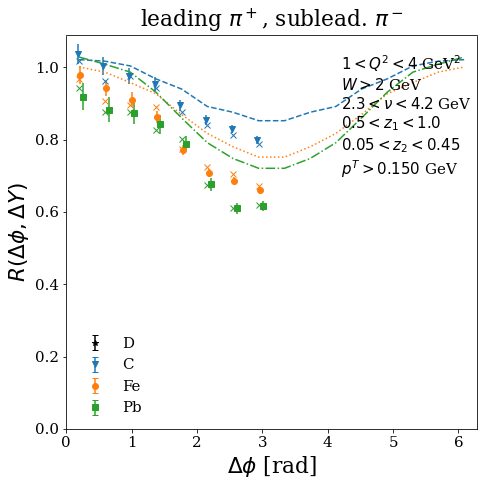

In [640]:
data, GiBUU = make_plots(None, usePRLcuts=True)
all_data['all']=data
all_GiBUU['all']=GiBUU

('D', 211, 0) estimated syst error from event mixing 0.11934710793033433
('C', 211, 0) estimated syst error from event mixing 0.11934710793033433
('Fe', 211, 0) estimated syst error from event mixing 0.11934710793033433
('Pb', 211, 0) estimated syst error from event mixing 0.11934710793033433
('D', 211, 1) estimated syst error from event mixing 0.036892945384593735
('C', 211, 1) estimated syst error from event mixing 0.036892945384593735
('Fe', 211, 1) estimated syst error from event mixing 0.036892945384593735
('Pb', 211, 1) estimated syst error from event mixing 0.036892945384593735
('D', 211, 2) estimated syst error from event mixing 0.0344504874878366
('C', 211, 2) estimated syst error from event mixing 0.0344504874878366
('Fe', 211, 2) estimated syst error from event mixing 0.0344504874878366
('Pb', 211, 2) estimated syst error from event mixing 0.0344504874878366
('D', 211, 3) estimated syst error from event mixing 0.10325989019860649
('C', 211, 3) estimated syst error from event

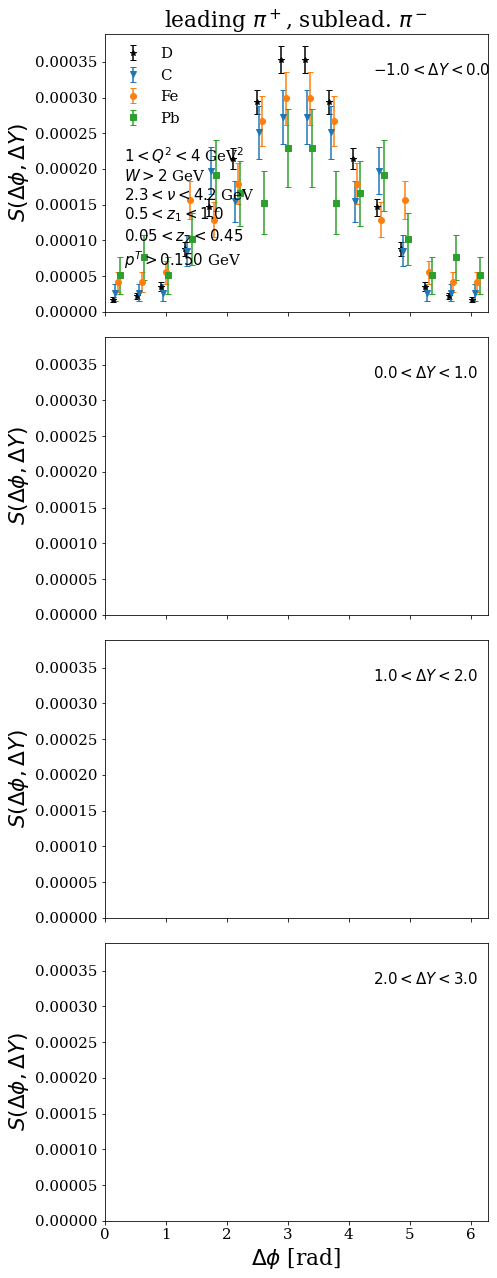

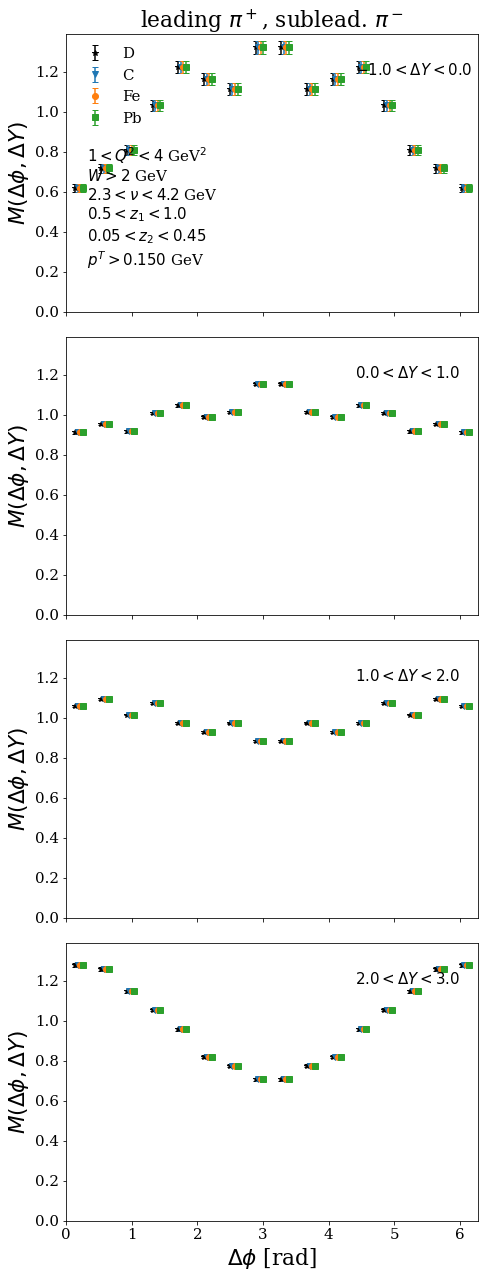

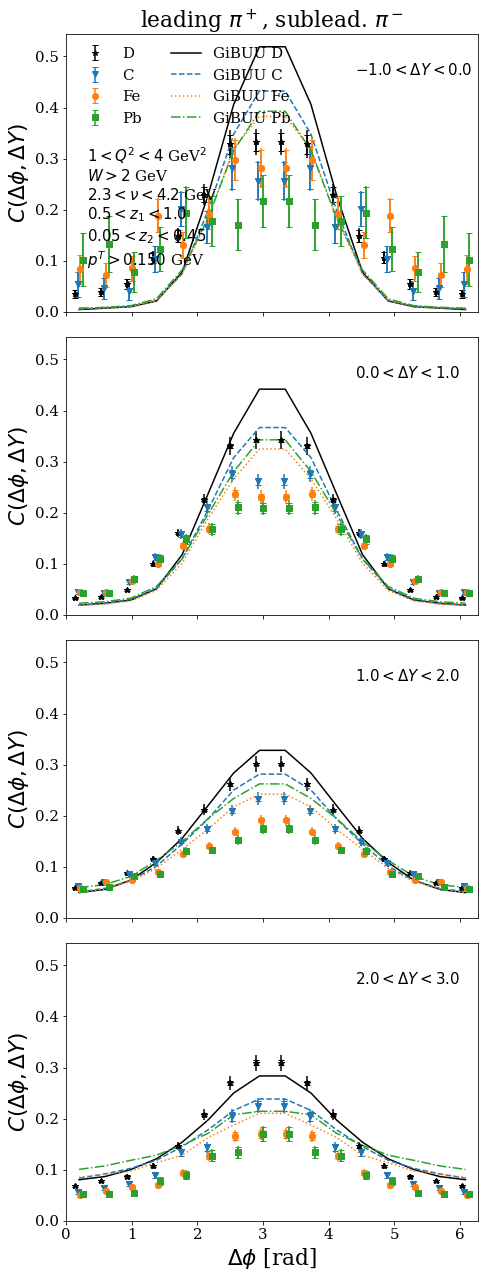

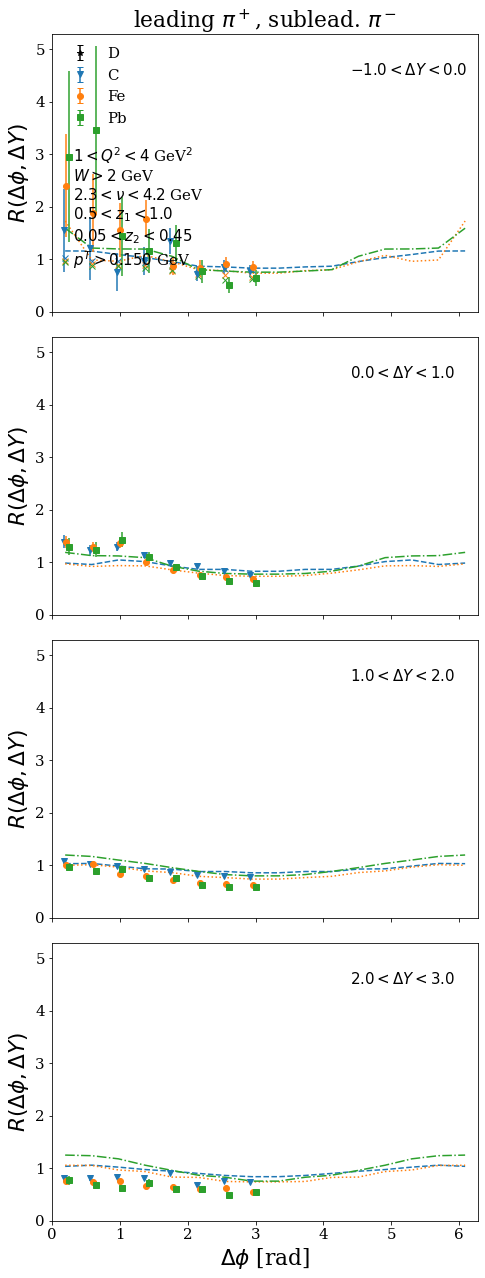

In [611]:
data, GiBUU = make_plots("drap", "\Delta Y", (-1,0, 1, 2,3))
all_data['drap']=data
all_GiBUU['drap']=GiBUU

#print(corr_func_data_dphi_dY)

In [483]:

#make_plots("pair_pt", "p^T_{\\rm pair}", (0,0.25, 0.5, 0.75, 1))

('D', 211, 0) estimated syst error from event mixing 0.03435178022476486
('C', 211, 0) estimated syst error from event mixing 0.03016260780687559
('Fe', 211, 0) estimated syst error from event mixing 0.03149500512292991
('Pb', 211, 0) estimated syst error from event mixing 0.023013777001674722
('D', 211, 1) estimated syst error from event mixing 0.02854234328546917
('C', 211, 1) estimated syst error from event mixing 0.025569684714510852
('Fe', 211, 1) estimated syst error from event mixing 0.025770573805918837
('Pb', 211, 1) estimated syst error from event mixing 0.025304582277171857
('D', 211, 2) estimated syst error from event mixing 0.02298494588422068
('C', 211, 2) estimated syst error from event mixing 0.02210452471561385
('Fe', 211, 2) estimated syst error from event mixing 0.01764571556179358
('Pb', 211, 2) estimated syst error from event mixing 0.02149196940606527
('D', 211, 3) estimated syst error from event mixing 0.022408155667362838
('C', 211, 3) estimated syst error from 

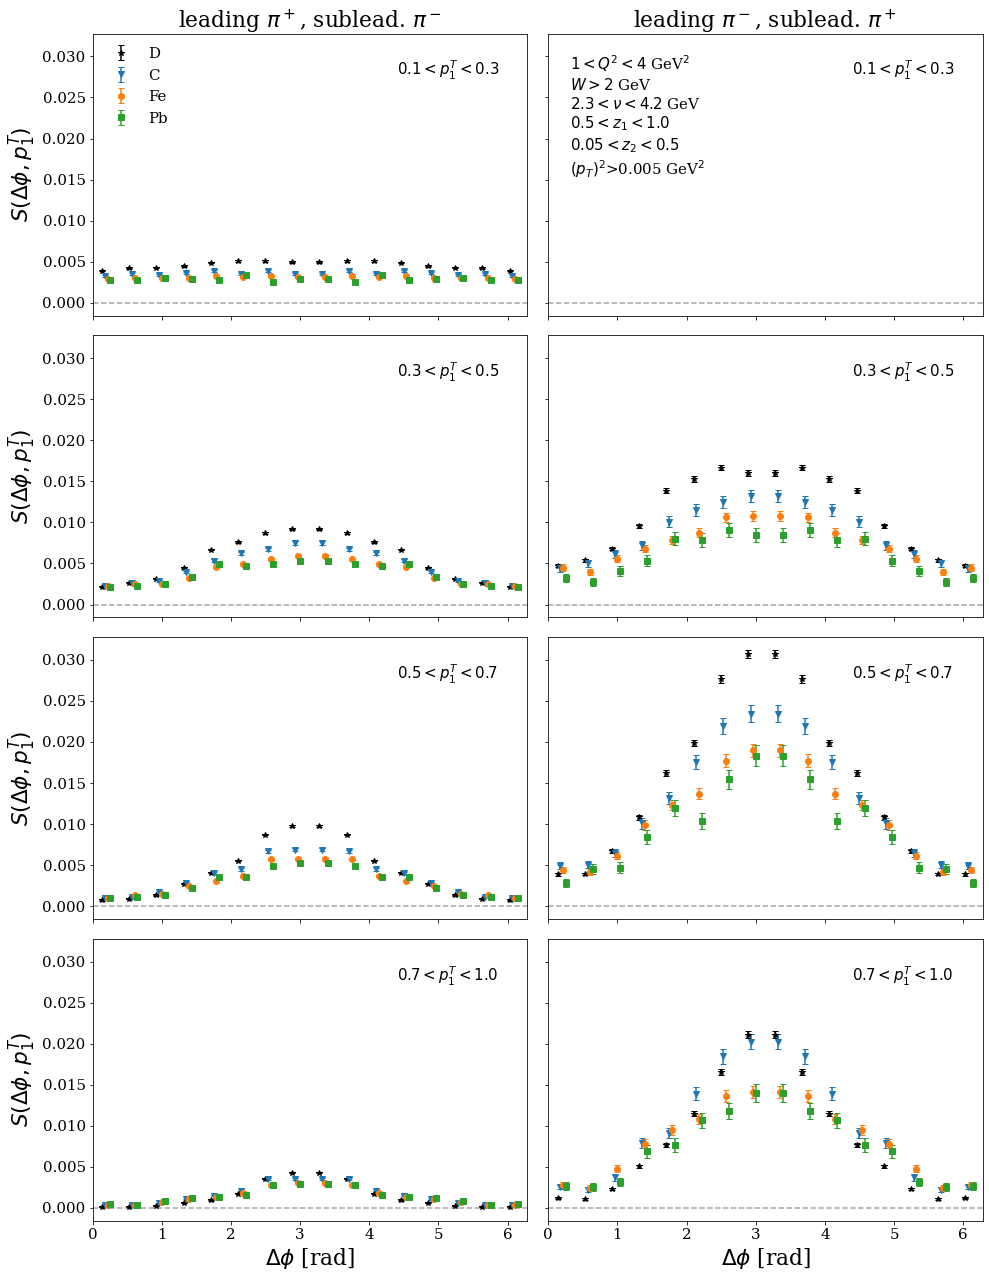

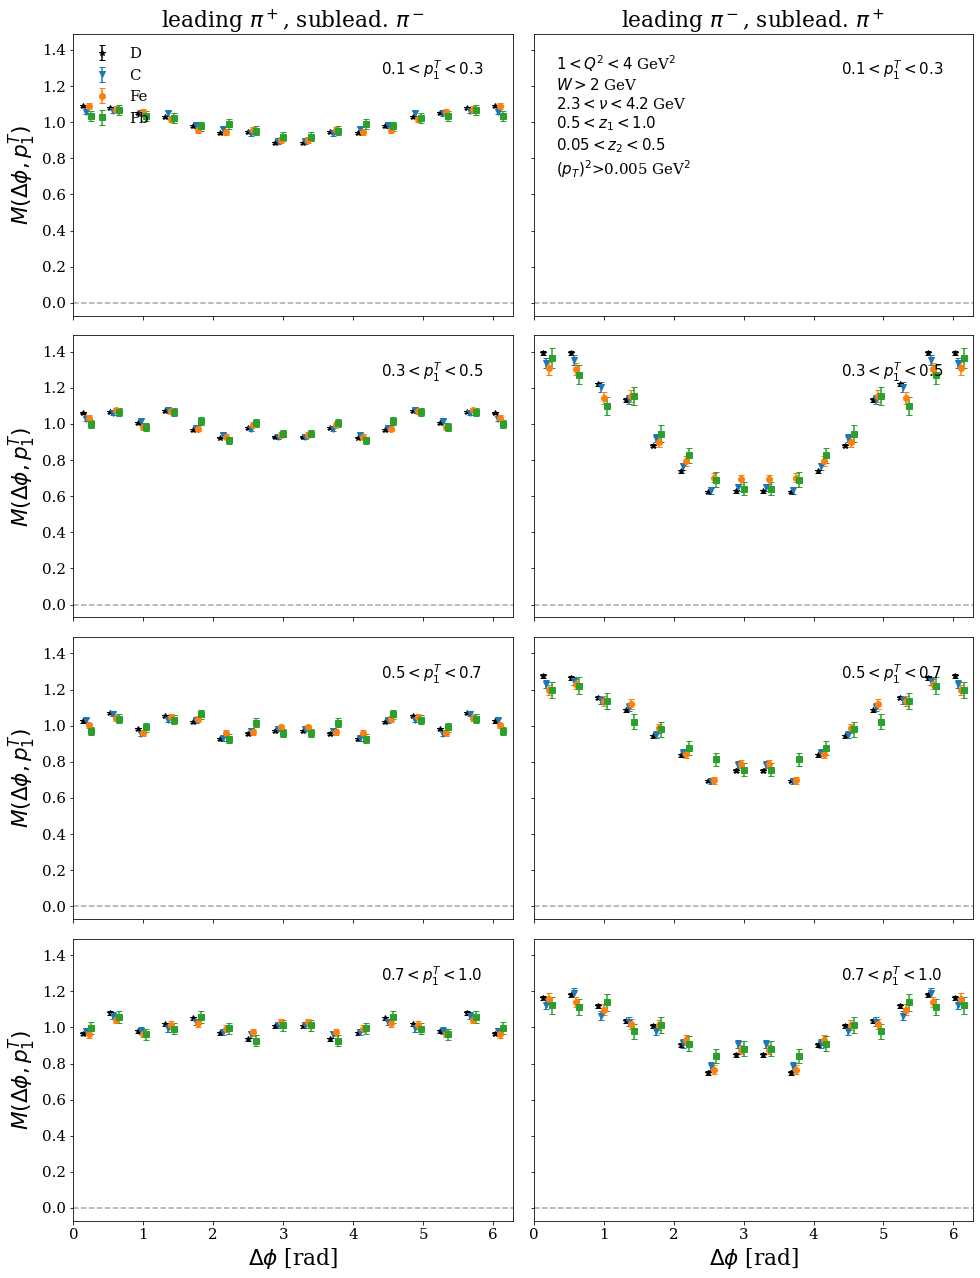

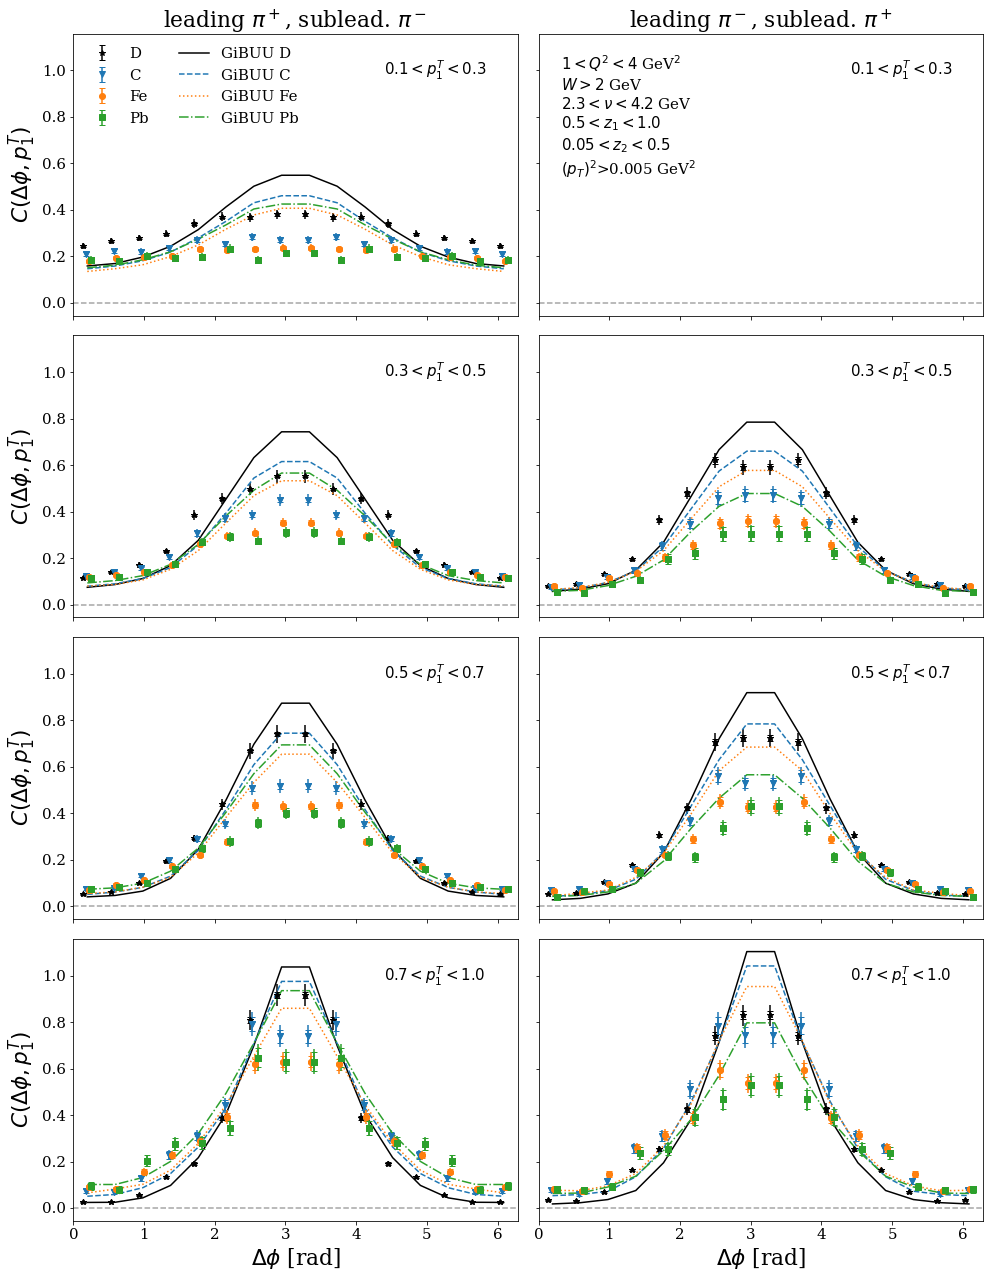

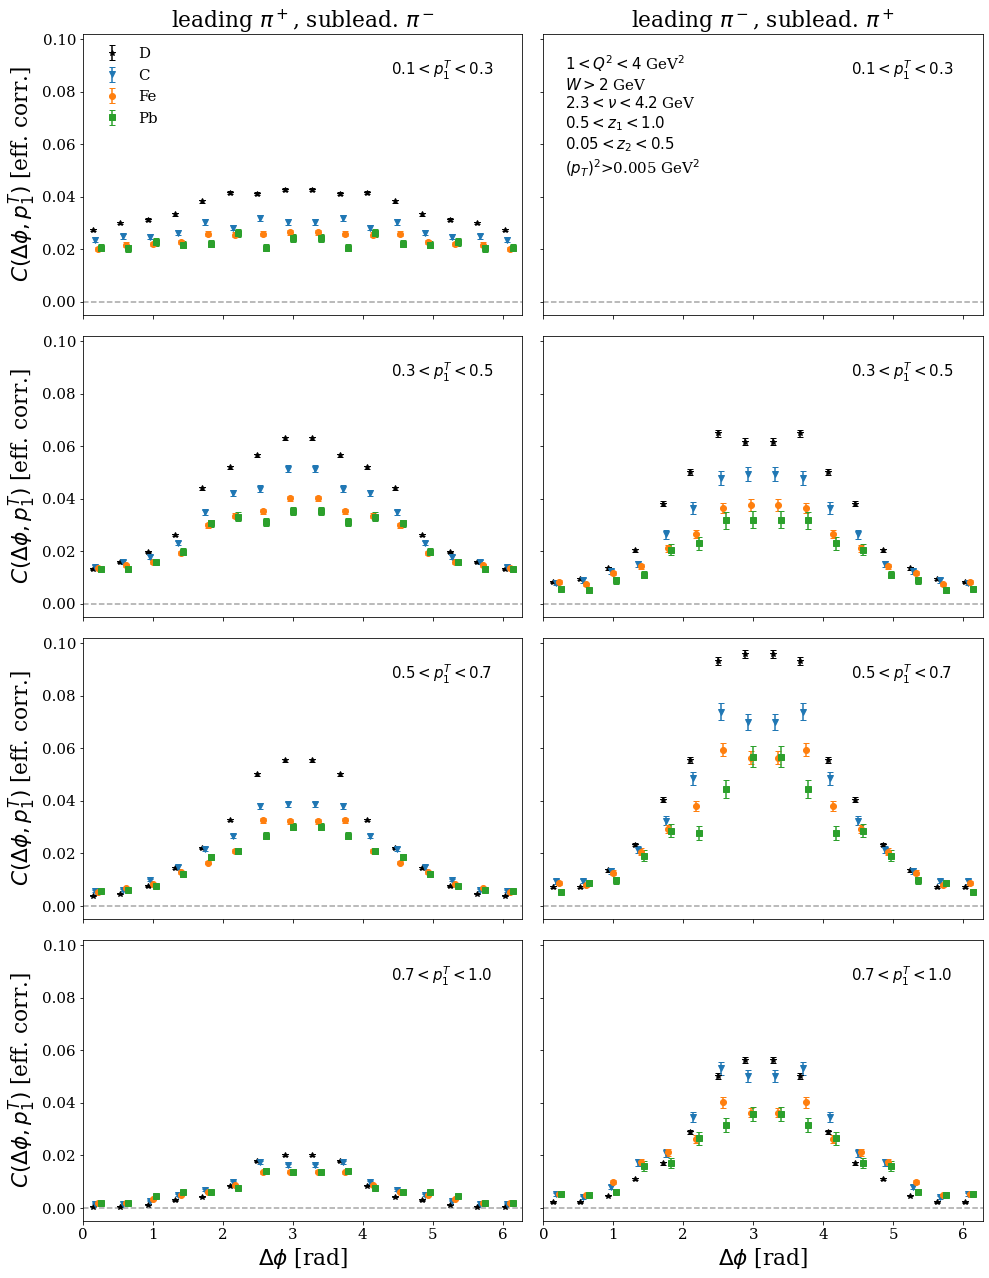

In [484]:

data, GiBUU = make_plots("h1_cm_pt", "p^T_{1}", (0.07,0.3, 0.5, 0.7, 1))
all_data['pT1']=data
all_GiBUU['pT1']=GiBUU

('D', 211, 0) estimated syst error from event mixing 0.04092727315729181
('C', 211, 0) estimated syst error from event mixing 0.03376960630026763
('Fe', 211, 0) estimated syst error from event mixing 0.02829753693116559
('Pb', 211, 0) estimated syst error from event mixing 0.031085620300609802
('D', 211, 1) estimated syst error from event mixing 0.02691352571928876
('C', 211, 1) estimated syst error from event mixing 0.024691956934167786
('Fe', 211, 1) estimated syst error from event mixing 0.023141507201794635
('Pb', 211, 1) estimated syst error from event mixing 0.023839741713093634
('D', 211, 2) estimated syst error from event mixing 0.09769039941281546
('C', 211, 2) estimated syst error from event mixing 0.08810833314265094
('Fe', 211, 2) estimated syst error from event mixing 0.07345321096012333
('Pb', 211, 2) estimated syst error from event mixing 0.06233747664841837
('D', -211, 0) estimated syst error from event mixing 0.036191936551768895
('C', -211, 0) estimated syst error fro

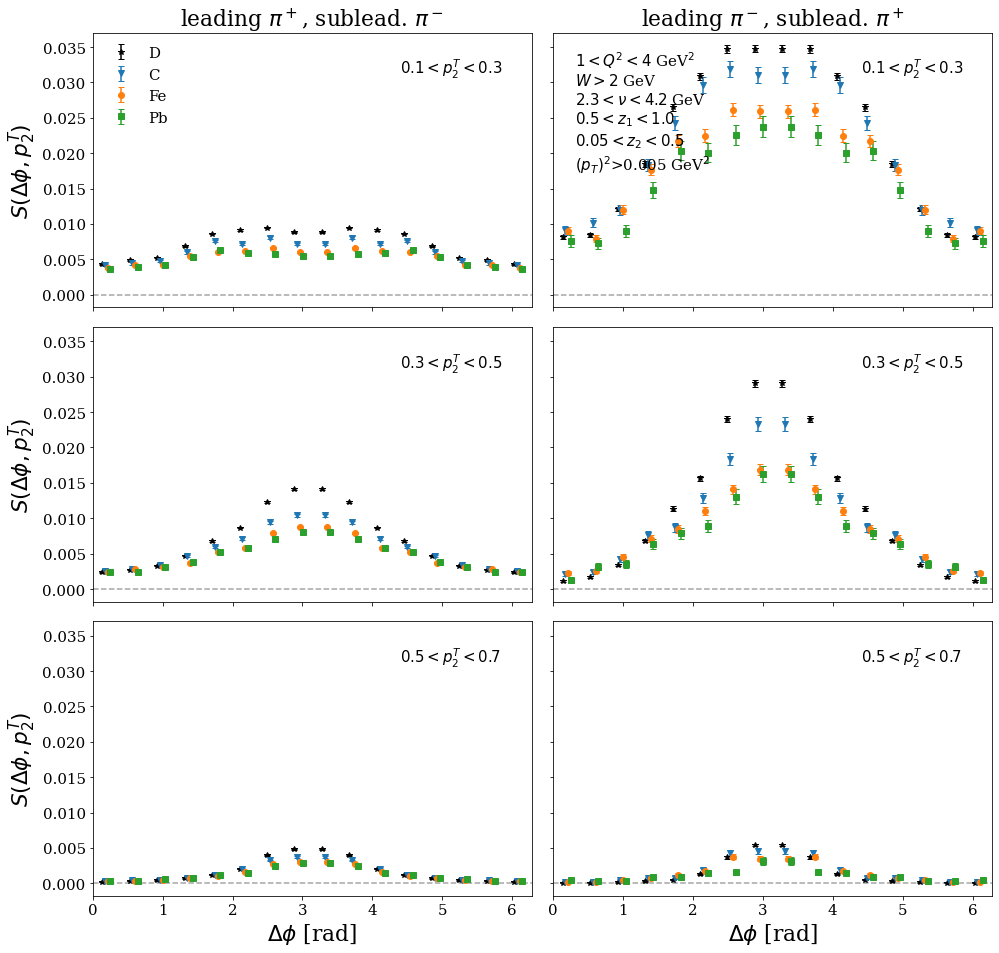

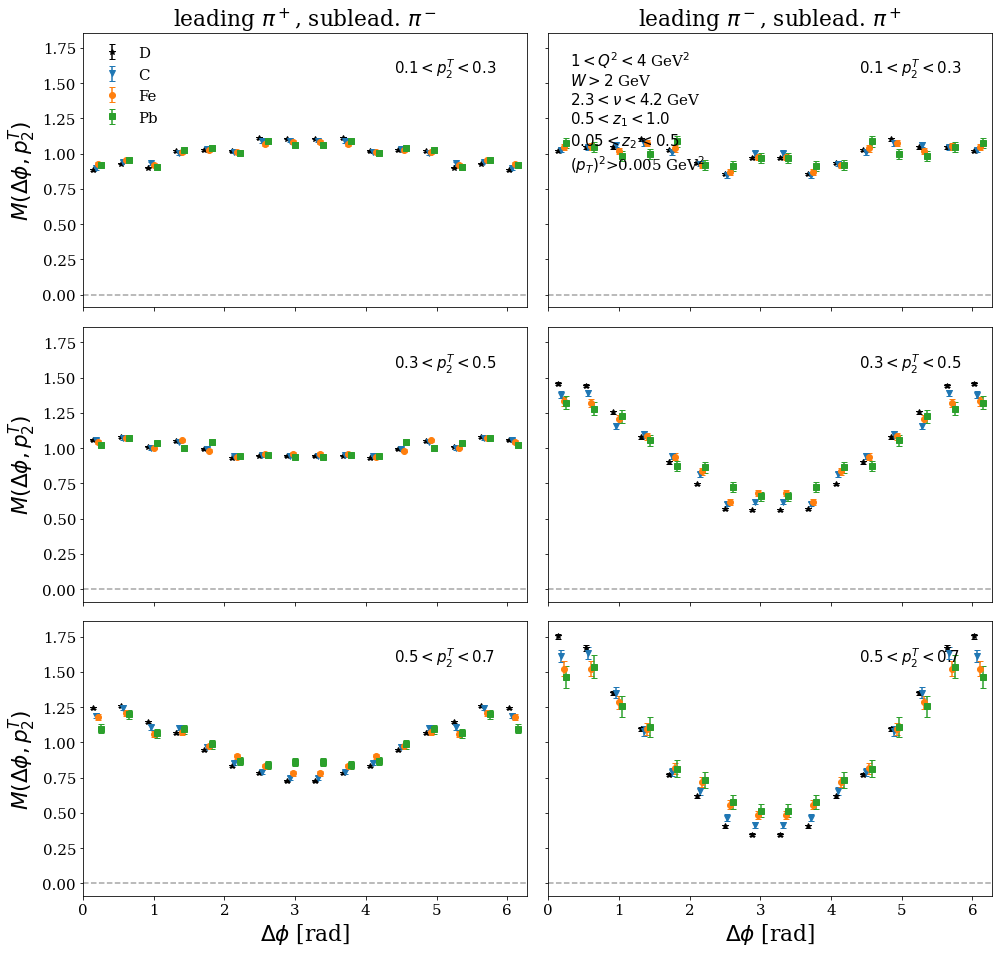

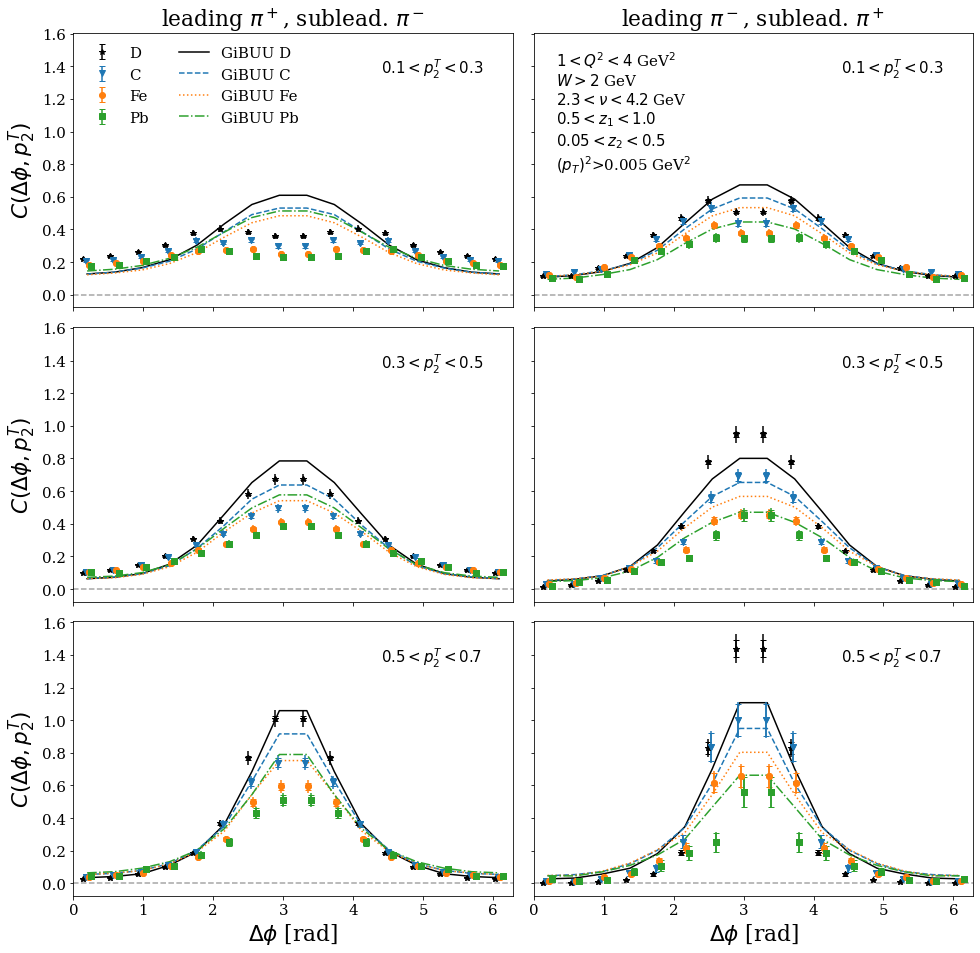

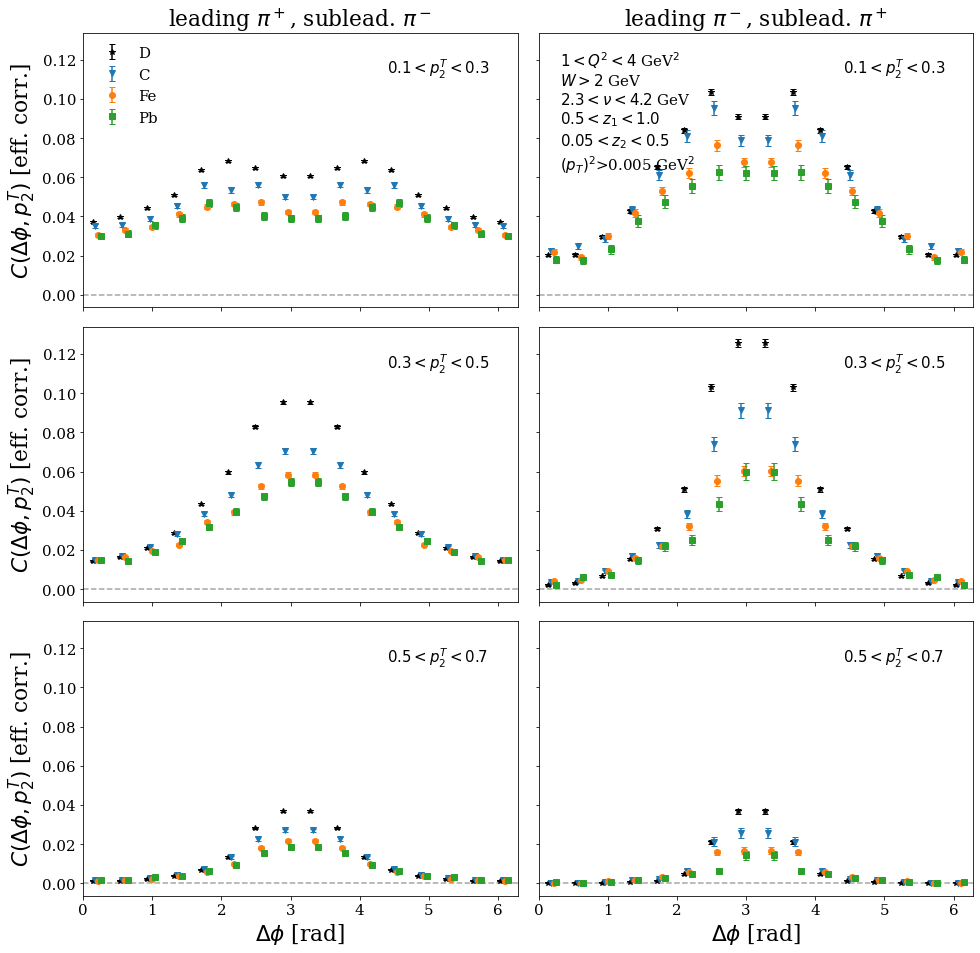

In [485]:
data, GiBUU = make_plots("h2_cm_pt", "p^T_{2}", (0.1,0.3, 0.5, 0.7))
all_data['pT2']=data
all_GiBUU['pT2']=GiBUU

('D', 211, 0)
('D', 211, 0)
('C', 211, 0)
('C', 211, 0)
('Fe', 211, 0)
('Fe', 211, 0)
('Pb', 211, 0)
('Pb', 211, 0)
('D', 211, 3)
('D', 211, 3)
('C', 211, 3)
('C', 211, 3)
('Fe', 211, 3)
('Fe', 211, 3)
('Pb', 211, 3)
('Pb', 211, 3)


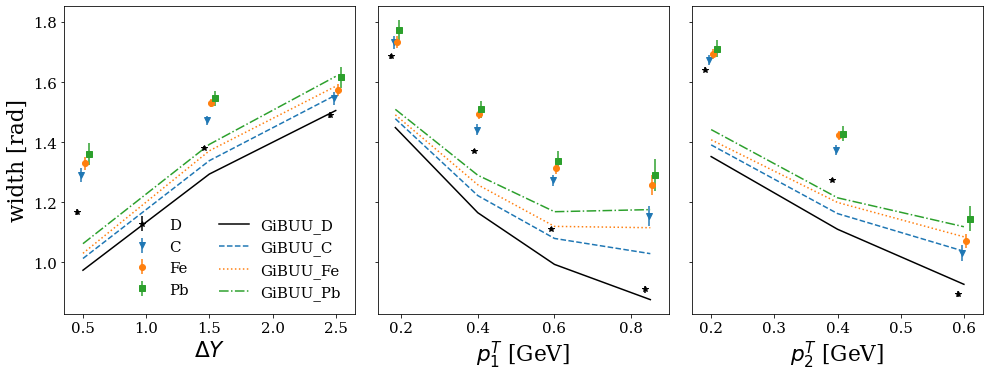

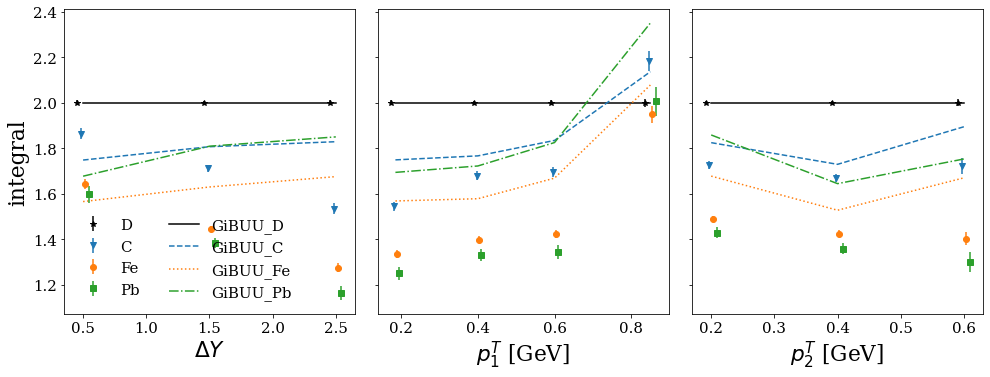

In [486]:
figs = {}
axs = {}

statkeys = 'widths', 'integrals'
for key in statkeys:
    fig, ax= plt.subplots(1,3, figsize=(14, 5.5), sharey='all')
    figs[key] = fig; axs[key] = ax 
titles = ["leading $\\pi^+$, sublead. $\\pi^-$", "leading $\\pi^-$, sublead. $\\pi^+$"]
    
varkeys='drap pT1 pT2'.split()
vartex='\Delta Y', 'p^T_1', 'p^T_2'
units = '', '[GeV]', '[GeV]'

linestyles='- -- : -.'.split()
colors='k tab:blue tab:orange tab:green'.split()
markers='*vos'

artists, labels=[],[]

for i in range(3):
    key = varkeys[i]
    for j in range(1):
    #for j in range(2):
        pid = [211,-211][j]
        #if i == 0:
        #    plt.title(titles[j])
        axs['integrals'][i].set_xlabel(f'${vartex[i]}$ {units[i]}')
        axs['widths'][i].set_xlabel(f'${vartex[i]}$ {units[i]}')
        
        for k in range(4):
            A = "D C Fe Pb".split()[k]
            widths=[]
            dwidths=[]
            integrals=[]
            dintegrals=[]
            xs=[]
            for l in range(4):
                data = all_data[key]
                subkey=A, pid, l
                #print(data.keys())
                found = False
                for kk in data.keys():
                    if kk == subkey:
                        found = True
                        break
                if not found:
                    print(subkey)
                if found:
                    d=data[subkey]
                    y = d['y']
                    dy = d['dystat']
                    bins=d['bins']
                    
                    phi=(bins[:-1]+bins[1:])/2
                    width=np.sqrt(sum(y*(phi-np.pi)**2)/sum(y))
                    widths.append(width)
                    
                    dwidth=np.sqrt(sum(dy**2*(phi-np.pi)**4)/sum(y))/(2*width)
                    dwidths.append(dwidth)
                    
                    
                    binwidth=bins[1]-bins[0]
                    integrals.append(sum(y)*binwidth*2)
                    dintegrals.append(np.sqrt(sum(dy**2))*binwidth*2)
                    
                    r = d['slice_range']
                    shift = (r[1]-r[0])*(k-1.5)*.03
                    xs.append((r[0]+r[1])/2+shift)
                    
                    
                    
            a=axs['widths'][i].errorbar(xs, widths, dwidths, color=colors[k], marker=markers[k],
                        linestyle='', label =A)
            if i == 0:
                artists.append(a)
                labels.append(A)
            axs['integrals'][i].errorbar(xs, integrals, dintegrals, color=colors[k], marker=markers[k],
                        linestyle='', label =A)
            #same for GiBUU:
            widths=[]
            xs=[]
            integrals=[]
            for l in range(4):
                GiBUU = all_GiBUU[key]
                subkey=A, pid, l
                #print(data.keys())
                found = False
                for kk in data.keys():
                    if kk == subkey:
                        found = True
                        break
                if not found:
                    print(subkey)
                if found:
                    d=GiBUU[subkey]
                    y = d['y']
                    bins=d['bins']
                    phi=(bins[:-1]+bins[1:])/2
                    width=np.sqrt(sum(y*(phi-np.pi)**2)/sum(y))
                    widths.append(width)
                    
                    binwidth=bins[1]-bins[0]
                    integrals.append(sum(y)*binwidth*2)
                    dintegrals.append(np.sqrt(sum(dy**2))*binwidth*2)
                    
                    r = d['slice_range']
                    xs.append((r[0]+r[1])/2)
            a=axs['widths'][i].plot(xs, widths, color=colors[k],
                        linestyle=linestyles[k], label ="GiBUU_"+A)
            if i == 0:
                artists.append(a[0])
                labels.append("GiBUU_"+A)
            axs['integrals'][i].plot(xs, integrals, color=colors[k],
                        linestyle=linestyles[k], label ="GiBUU_"+A)
axs['widths'][0].set_ylabel("width [rad]")
axs['integrals'][0].set_ylabel("integral")

indices = [0,2,4, 6, 1,3, 5,7]
axs['widths'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0)

axs['integrals'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0)

figs['widths'].tight_layout()
figs['integrals'].tight_layout()
plt.show()
        

[0.5, 1.5, 2.5] [-1.1589156942930656, -0.7852727055893396, -0.5193578444520156]
[0.5, 1.5, 2.5] [-1.110397908382466, -0.7259399681113764, -0.433453756312949]
[0.5, 1.5, 2.5] [-1.087792368934194, -0.6772431701863305, -0.3901475050178939]
[0.5, 1.5, 2.5] [-1.0395291407554914, -0.6430852341588917, -0.33239087019954167]
[-0.5, 0.5, 1.5] [-1.4325364894501802, -1.2481496737914912, -0.8641922006586834]
[-0.5, 0.5, 1.5] [-1.3806539710134689, -1.1908267749690404, -0.7892441525381194]
[-0.5, 0.5, 1.5] [-1.3697861404168634, -1.1579950776603205, -0.7380175641148145]
[-0.5, 0.5, 1.5] [-1.3628992553812187, -1.1437631562687745, -0.7313407020788238]


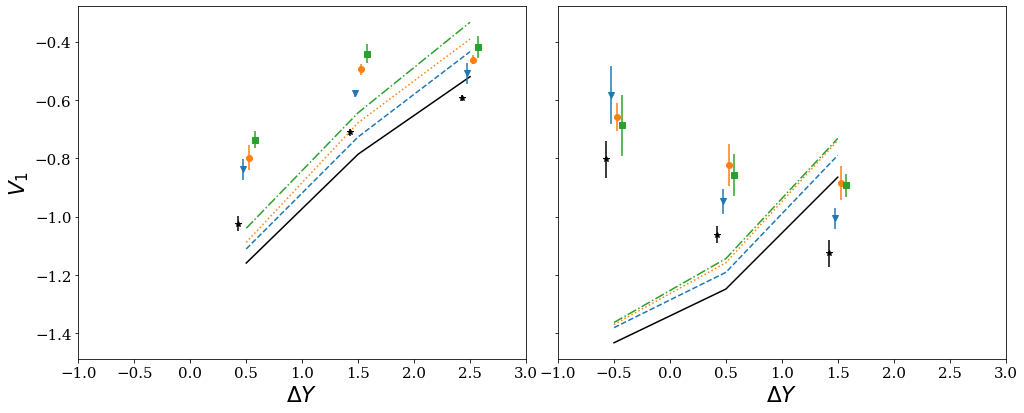

[0.5, 1.5, 2.5] [0.436990768571804, 0.17250728400495333, 0.11781494056791247]
[0.5, 1.5, 2.5] [0.3884989985046018, 0.15370326995113615, 0.08453368577226265]
[0.5, 1.5, 2.5] [0.3710613538937691, 0.11777091655182365, 0.07944818836513648]
[0.5, 1.5, 2.5] [0.3504540556401665, 0.1017169585644086, 0.06214576133370948]
[-0.5, 0.5, 1.5] [0.6876487562459159, 0.4835212989775113, 0.19341553327660094]
[-0.5, 0.5, 1.5] [0.6108280086286845, 0.43687867079009735, 0.15040631752350034]
[-0.5, 0.5, 1.5] [0.6004770377870663, 0.39525102449628685, 0.1351272597209245]
[-0.5, 0.5, 1.5] [0.59611490158343, 0.4051255139582437, 0.11257138860029715]


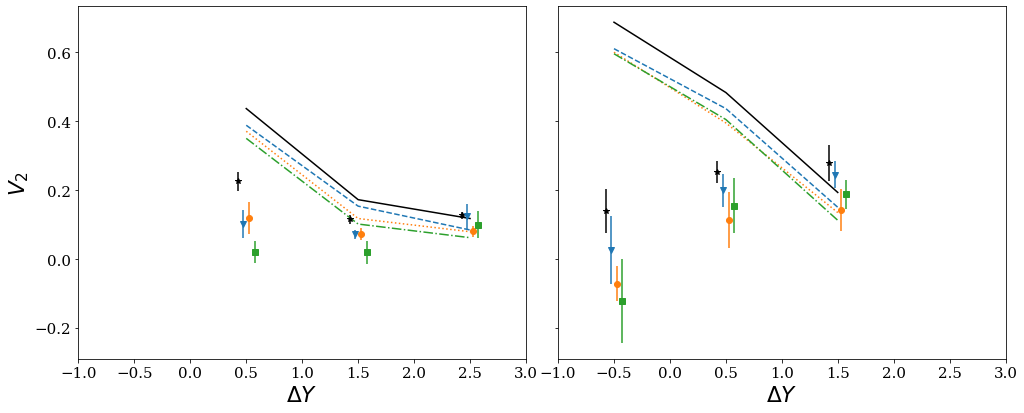

In [320]:



import scipy.optimize as opt
#help(opt.curve_fit)
for ii in range(2):
    fig, axs = plt.subplots(1,2, figsize=(14,6),sharey='all', sharex='all')
    for j in range(2):
        plt.sca(axs[j])
        pid = pids[j]
        colors='k tab:blue tab:orange tab:green'.split()
        markers='*vos'
        for i, A in enumerate("D C Fe Pb".split()):
            a=[]
            da=[]
            dY=[]
            shift=(i-1.5)*.05
            for k in range(npanels_dY):

                key = (A, pid,k)
                if key not in corr_func_data_dphi_dY.keys():
                    continue
                data=corr_func_data_dphi_dY[key] 
                y=data['y']
                dystat=data['dystat']
                dysyst=data['dysyst']
                bins=data["bins"]
                dY_range=data["dY_range"]
                x=(bins[1:]+bins[:-1])/2
                f = lambda x,V1,V2, N: (1+V1*np.cos(x)+V2*np.cos(2*x))*N
                popt, pcov = opt.curve_fit(f,x, y, sigma=dystat)
                a.append(popt[ii])
                da.append(np.sqrt(pcov[ii][ii]))
                dY.append(np.mean(dY_range))
            plt.errorbar(np.add(dY,shift), a, da, color=colors[i], linestyle='', marker=markers[i])

            dY=[]
            a=[]
            for k in range(npanels_dY):
                key = (A, pid,k)
                if key not in corr_func_GiBUU_dphi_dY.keys():
                    continue
                GiBUU=corr_func_GiBUU_dphi_dY[(A, pid,k)]
                y=GiBUU['y']
                bins=GiBUU["bins"]
                dY_range=GiBUU["dY_range"]
                x=(bins[1:]+bins[:-1])/2
                f = lambda x,V1,V2, N: (1+V1*np.cos(x)+V2*np.cos(2*x))*N
                popt, pcov = opt.curve_fit(f,x, y)
                a.append(popt[ii])
                dY.append(np.mean(dY_range))
            print(dY, a)
            plt.plot(dY, a, color=colors[i], linestyle=linestyles[i], marker='')


        plt.xlabel("$\Delta Y$")
        #plt.ylim(-2, 0)
        plt.xlim(-1, 3)
    plt.tight_layout()
    axs[0].set_ylabel(f"$V_{ii+1}$")
    plt.show();

In [302]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    sele

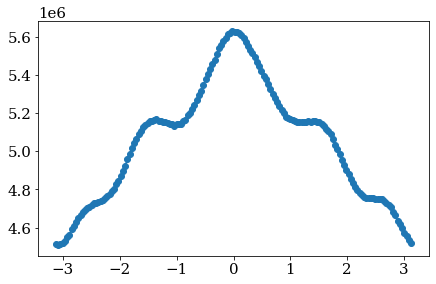

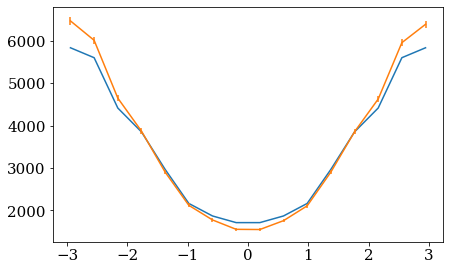

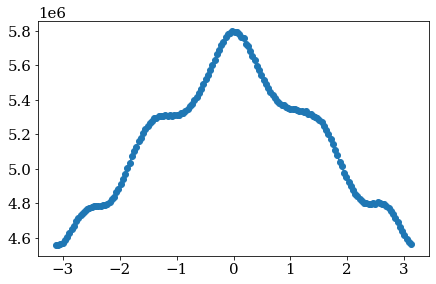

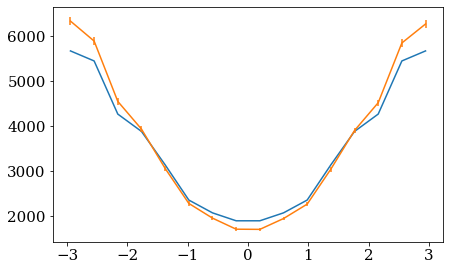

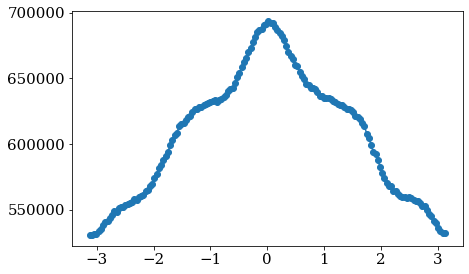

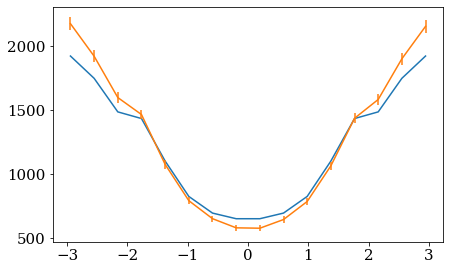

In [238]:
for a in 'C Fe Pb'.split():
    df = dfs_data[a+"_2pi"].query("h1_cm_pt>.0707 and h2_cm_pt>.0707 and h2_z>0.05")

    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    #print(y1)
    ym=[0]*len(y1)
    #print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]
    plt.plot(x, ym, marker='o')
    plt.show()

    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    #print(len(ym))
    ym=pd.Series(ym)
    yd, x =np.histogram(df.dphi, bins=np.linspace(0, np.pi, nbins//2+1))
    yd = pd.Series(list(reversed(yd)) + list(yd))

    x=np.linspace(-np.pi, np.pi, nbins+1)
    x=(x[:-1]+x[1:])/2
    #print(len(yd))
    plt.plot(x,yd)  
    ym = (ym/(sum(ym)/len(ym)))
    plt.errorbar(x,yd/ym, np.sqrt(yd)/ym)
    plt.show()

[2612 2610 2509 2460 2540 2476 2410 2368 2262 2267 2119 2048 1902 1789
 1680 1594 1430 1322 1179 1105 1047  992  929  945  913  968 1092 1016
 1097 1202 1233 1268 1298 1361 1444 1448 1506 1528 1474 1517 1523 1477
 1491 1463 1402 1369 1384 1369 1103 1164 1053  970  907  855  801  690
  713  568  593  506  509  439  436  398  357  361  348  301  214  201
  175  128  119  108  131  120  129  143  174  186  176  160  151  163
  111  121  106  112  119  137  173  218  253  335  367  341  385  410
  432  493  503  570  608  711  702  799  849  910 1024 1049 1085 1147
 1233 1280 1334 1413 1454 1497 1508 1543 1527 1480 1513 1447 1409 1396
 1387 1372 1283 1182 1187 1133 1035  954  952  950  953  960  969 1084
 1068 1132 1294 1393 1503 1625 1692 1860 2066 2101 2208 2262 2422 2395
 2506 2615 2595 2533 2605 2508]
160 160
[407 404 427 446 388 442 365 369 349 362 364 292 316 287 259 245 212 186
 193 169 156 153 135 149 142 165 159 160 193 178 173 195 194 227 218 221
 233 266 266 237 239 215 237 213 

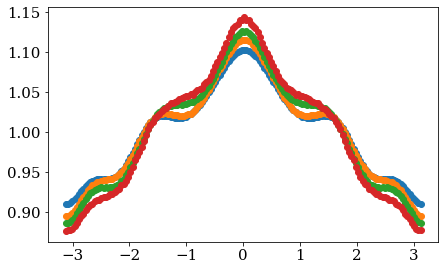

In [243]:
for a in "D C Fe Pb".split():
    df = dfs_data[a+"_2pi"].query("h1_cm_pt>.0707 and h2_cm_pt>.0707 and h2_z>0.05")

    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    print(y1)
    ym=[0]*len(y1)
    print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    
    plt.plot(x, ym, marker='o')
plt.show()



In [ ]:
def mix_corr(df):
    nbins=16
    subbins = 10
    
    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    print(y1)
    ym=[0]*len(y1)
    print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    return ym[len(ym)//2:]

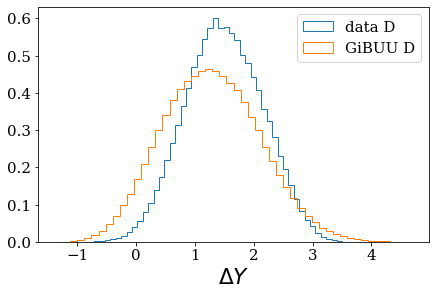

In [469]:
for pid in 211,:
    for a in 'D'.split():
        plt.hist(dfs_data[f'{a}_2pi'].query(f"h1_pid=={pid}").drap, bins=50, density=True,
                label=f'data {a}', histtype='step')
        plt.hist(dfs_data[f'GiBUU_{a}_2pi'].query(f"h1_pid=={pid}").drap, bins=50, density=True,
                label=f'GiBUU {a}', histtype='step')
    plt.xlabel('$\Delta Y$')
    plt.legend()
    plt.show()
    

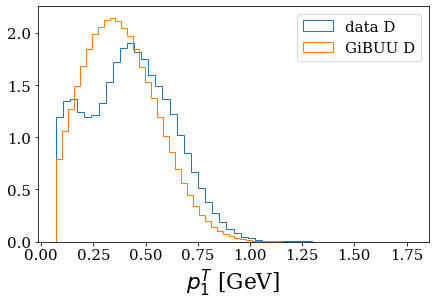

In [470]:
for pid in 211,:
    for a in 'D'.split():
        plt.hist(dfs_data[f'{a}_2pi'].query(f"h1_pid=={pid}").h1_cm_pt, bins=50, density=True,
                label=f'data {a}', histtype='step')
        plt.hist(dfs_data[f'GiBUU_{a}_2pi'].query(f"h1_pid=={pid}").h1_cm_pt, bins=50, density=True,
                label=f'GiBUU {a}', histtype='step')
    plt.xlabel('$p^T_1$ [GeV]')
    plt.legend()
    plt.show()

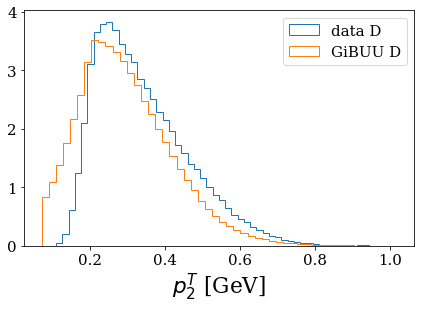

In [471]:
for pid in 211,:
    for a in 'D'.split():
        plt.hist(dfs_data[f'{a}_2pi'].query(f"h1_pid=={pid}").h2_cm_pt, bins=50, density=True,
                label=f'data {a}', histtype='step')
        plt.hist(dfs_data[f'GiBUU_{a}_2pi'].query(f"h1_pid=={pid}").h2_cm_pt, bins=50, density=True,
                label=f'GiBUU {a}', histtype='step')
    plt.xlabel('$p^T_2$ [GeV]')
    plt.legend()
    plt.show()